In [0]:
!pip install openpyxl
!pip install xlrd

In [0]:
!pip install pydrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
!pip install geocoder

     |████████████████████████████████| 102kB 2.7MB/s 


In [0]:
# Creating a mechanism so that I can load function from other python modules

import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [0]:
#!pip install tensorflow
#!pip uninstall tensorflow
#!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

#Imports

In [0]:
# Module imports so that functions can easily operate
    
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib as plt
from pandas import DataFrame
import codecs
import openpyxl
from ipykernel import kernelapp as app
import timeit

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Functions

In [0]:
def fileread(ID, filestring,delimiter):
    %timeit
    import codecs
  
    train_downloaded = drive.CreateFile({'id': ID})
    
    train_downloaded.GetContentFile(filestring)


    datanew =[]
    i = 0
    reader = codecs.open(filestring, 'r', encoding='utf-8', errors = "ignore")
    for line in reader:
        i= i+1
        row = line.split(delimiter)
        datanew.append(row)
    return datanew

In [0]:
def fileread2(ID, filestring):
    
    train_downloaded = drive.CreateFile({'id': ID})
    
    train_downloaded.GetContentFile(filestring)
    #datanew = pd.read_csv(filestring, encoding="ISO-8859-1")
    datanew = pd.read_excel(filestring)
    
    return datanew 

#Reading data


In [0]:
file_list = drive.ListFile({'q': "'1eXINeTsO1MGGJjP9MzW91vPcktk4hwZk' in parents and trashed=false"}).GetList()
for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))

W0720 09:54:00.850920 139631397721984 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

title: MachineHack- Used Car Price Predicition.ipynb, id: 1ih6QFA-z8s-2v6P1-l2aGJf_tCnIUZML
title: test_set_new.xlsx, id: 1R2YuYBRPClJjBV2_TdIZ7O17TmoyNFZS
title: training_set_new.xlsx, id: 1pfSWMAGDxWXcZ_hcZGWcYy9dwtlCasHq
title: Data_Train.xlsx, id: 1ihPrgcXdScSTCPSBRGoUs8mBFW6Y4Vg2
title: Sample_submission.xlsx, id: 1d7zNBYVRiSx8aehZ7I5iMo2rIaQ1mibL
title: Data_Test.xlsx, id: 1-eK-wzQkR8zlTzIlAqzO57J7f2-RR2Tf


In [0]:
training_set = fileread2("1ihPrgcXdScSTCPSBRGoUs8mBFW6Y4Vg2","Data_Train.xlsx")
test_set = fileread2("1-eK-wzQkR8zlTzIlAqzO57J7f2-RR2Tf","Data_Test.xlsx")

W0720 11:00:55.510390 139631397721984 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [0]:
training_set = fileread2("1pfSWMAGDxWXcZ_hcZGWcYy9dwtlCasHq","training_set_new.xlsx")
test_set = fileread2("1R2YuYBRPClJjBV2_TdIZ7O17TmoyNFZS","test_set_new.xlsx")

# Exploratory Data Analysis

## Data Pre processing

In [0]:
#checking the number of features in the Datasets
print("Number of features in the datasets :")
print("Training Set : ", len(training_set.columns))
print("Test Set : ",len(test_set.columns))

Number of features in the datasets :
Training Set :  13
Test Set :  12


In [0]:
#List of feature column in the Datasets
print("Number of features in the datasets :")
print("Training Set : ", list(training_set.columns))
print("Test Set : ",list(test_set.columns))

Number of features in the datasets :
Training Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
Test Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']


In [0]:
#checking the data types of features
print("Datatypes of features in the datasets :")
print("Training Set : \n", training_set.dtypes)
print("Test Set : \n",test_set.dtypes)

Datatypes of features in the datasets :
Training Set : 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object
Test Set : 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object


In [0]:
#checking the number of rows in the Datasets
print("Number of rows in the datasets :")
print("Training Set : ", len(training_set))
print("Test Set : ",len(test_set))

Number of rows in the datasets :
Training Set :  6019
Test Set :  1234


In [0]:
#checking for NaNs or empty cells
print("\n\nEmpty cells or Nans in the datasets :")
print("\nTraining Set : \n",training_set.isnull().sum())
print("\nTest Set : \n",test_set.isnull().sum())



Empty cells or Nans in the datasets :

Training Set : 
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Test Set : 
 Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


In [0]:
#Exploring Categorical variables
#combining training set and test set data
all_brands = list(training_set.Name) + list(test_set.Name)
all_locations = list(training_set.Location) + list(test_set.Location)
all_fuel_types = list(training_set.Fuel_Type) + list(test_set.Fuel_Type)
all_transmissions = list(training_set.Transmission) + list(test_set.Transmission)
all_owner_types = list(training_set.Owner_Type) + list(test_set.Owner_Type)

In [0]:
training_set.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [0]:
#DataCleaning
#1.) Feature column : Name - Separating the column as Brand and Model
#Training Set
names = list(training_set.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
training_set["Brand"] =  brand
training_set["Model"] = model
training_set.drop(labels = ['Name'], axis = 1, inplace = True)

In [0]:
#Test Set data cleaning for Name Column
names = list(test_set.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
test_set["Brand"] =  brand
test_set["Model"] = model
test_set.drop(labels = ['Name'], axis = 1, inplace = True)

In [0]:
training_set.Brand.replace('ISUZU','Isuzu', inplace=True)
test_set.Brand.replace('ISUZU','Isuzu',  inplace=True)

In [0]:
###### Make model variant ########

model = list(training_set.Model)
variant = []
model_new = []
for i in range(len(model)):
   try:
       model_new.append(model[i].split(" ")[0].strip())
       try:
           variant.append(" ".join(model_new[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", model_new[i], "@" , i)
training_set["Model_new"] =  model_new
training_set["Variant"] = variant
#training_set.drop(labels = ['Name'], axis = 1, inplace = True)

In [0]:
model = list(test_set.Model)
variant = []
model_new = []
for i in range(len(model)):
   try:
       model_new.append(model[i].split(" ")[0].strip())
       try:
           variant.append(" ".join(model_new[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", model_new[i], "@" , i)
test_set["Model_new"] =  model_new
test_set["Variant"] = variant

In [0]:
test_set['Brand'].value_counts()

Maruti           233
Hyundai          233
Honda            135
Toyota            96
Mercedes-Benz     62
Mahindra          59
Volkswagen        59
Ford              51
Audi              49
BMW               45
Tata              42
Chevrolet         30
Skoda             29
Nissan            26
Renault           25
Fiat              10
Mitsubishi         9
Jaguar             8
Land               7
Volvo              7
Mini               5
Datsun             4
Jeep               4
Isuzu              2
Porsche            1
OpelCorsa          1
Bentley            1
Hindustan          1
Name: Brand, dtype: int64

In [0]:
#Feature Column : Mileage
#""" Removing the  mileage units"""

# Training Set
training_set.Mileage = training_set.Mileage.fillna(0.0)
mileage = list(training_set.Mileage)
for i in range(len(mileage)):
    mileage[i] = str(mileage[i]).split(" ")[0].strip()
training_set['Mileage'] = mileage
training_set['Mileage'] = training_set['Mileage'].astype(float)

training_set['Mileage'] = training_set['Mileage'].replace(0,training_set['Mileage'].mean())

In [0]:
#Feature Column : Mileage
#""" Removing the  mileage units"""

# Testing Set
test_set.Mileage = test_set.Mileage.fillna(0.0)
mileage = list(test_set.Mileage)
for i in range(len(mileage)):
    mileage[i] = str(mileage[i]).split(" ")[0].strip()
test_set['Mileage'] = mileage
test_set['Mileage'] = test_set['Mileage'].astype(float)

test_set['Mileage'] = test_set['Mileage'].replace(0,test_set['Mileage'].mean())

In [0]:
training_set = training_set.rename(columns = {'New_Price_final':'New_Price_final_predicted'})
test_set = test_set.rename(columns = {'New_Price_final':'New_Price_final_predicted'})

In [0]:
#training_set

In [0]:
#training_set
#new_price_unit
new_train = training_set["New_Price"].str.split(" ", n = 1, expand = True)

training_set["New_Price_value"]= new_train[0]
training_set["New_Price_unit"]= new_train[1]
training_set.New_Price_value = training_set.New_Price_value.fillna(0.0)
training_set['New_Price_value'] = training_set['New_Price_value'].astype(float)
training_set['unit'] =1

training_set.loc[training_set['New_Price_unit'] == 'Cr', 'unit'] = 100

training_set['New_Price_final'] = training_set['New_Price_value']*training_set['unit']

In [0]:

new_test = test_set["New_Price"].str.split(" ", n = 1, expand = True)

test_set["New_Price_value"]= new_test[0]
test_set["New_Price_unit"]= new_test[1]
test_set.New_Price_value = test_set.New_Price_value.fillna(0.0)
test_set['New_Price_value'] = test_set['New_Price_value'].astype(float)
test_set['unit'] =1

test_set.loc[test_set['New_Price_unit'] == 'Cr', 'unit'] = 100

test_set['New_Price_final'] = test_set['New_Price_value']*test_set['unit']

In [0]:
#Feature Column : Engine
#""" Removing the  Engine units"""

# Training Set
training_set.Engine = training_set.Engine.fillna(0)
engine = list(training_set.Engine)
for i in range(len(engine)):
    engine[i] = str(engine[i]).split(" ")[0].strip()
training_set['Engine'] = engine
training_set['Engine'] = training_set['Engine'].astype(int)
training_set['Engine'] = training_set['Engine'].replace(0,training_set['Engine'].mean())
training_set.head()

#Feature Column : Engine
#""" Removing the  Engine units"""

# Training Set
test_set.Engine = test_set.Engine.fillna(0)
engine = list(test_set.Engine)
for i in range(len(engine)):
    engine[i] = str(engine[i]).split(" ")[0].strip()
test_set['Engine'] = engine
test_set['Engine'] = test_set['Engine'].astype(int)
test_set['Engine'] = test_set['Engine'].replace(0,test_set['Engine'].mean())

In [0]:
#Feature Column : Power
#""" Removing the  Power units"""

# Training Set
training_set.Power = training_set.Power.fillna(0.0)
power = list(training_set.Power)
for i in range(len(power)):
    power[i] = str(power[i]).split(" ")[0].strip()
training_set['Power'] = power


training_set['Power'] = training_set['Power'].str.replace("null", "0.0", case = False)

#training_set['Power'] = training_set['Power'].replace(0,training_set['Power'].mean())

In [0]:
training_set['Power'] = training_set['Power'].astype(float)

In [0]:
training_set['Power'] = training_set['Power'].replace(0,training_set['Power'].mean())

In [0]:
#Feature Column : Power
#""" Removing the  Power units"""

# Test Set
test_set.Power = test_set.Power.fillna(0.0)
power = list(test_set.Power)
for i in range(len(power)):
    power[i] = str(power[i]).split(" ")[0].strip()
test_set['Power'] = power

In [0]:
test_set['Power'] = test_set['Power'].str.replace("null", "0.0", case = False) 
test_set['Power'] = test_set['Power'].astype(float)

In [0]:
test_set['Power'] = test_set['Power'].replace(0,test_set['Power'].mean())

In [0]:
training_set['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [0]:

#training_set['Seats'].fillna(training_set['Seats'].value_counts().max(), inplace=True)
#test_set['Seats'].fillna(test_set['Seats'].value_counts().max(), inplace=True)


training_set['Seats'] = training_set['Seats'].replace(0, 5)
test_set['Seats'] = test_set['Seats'].replace(0, 5)

training_set['Seats'].fillna(5, inplace=True)
test_set['Seats'].fillna(5, inplace=True)

In [0]:
#Dropping Feature/Column : New_Price as it has many NaN
#training_set.drop(labels = ['New_Price'], axis = 1, inplace = True)
#test_set.drop(labels = ['New_Price'], axis = 1, inplace = True)

##Visualization

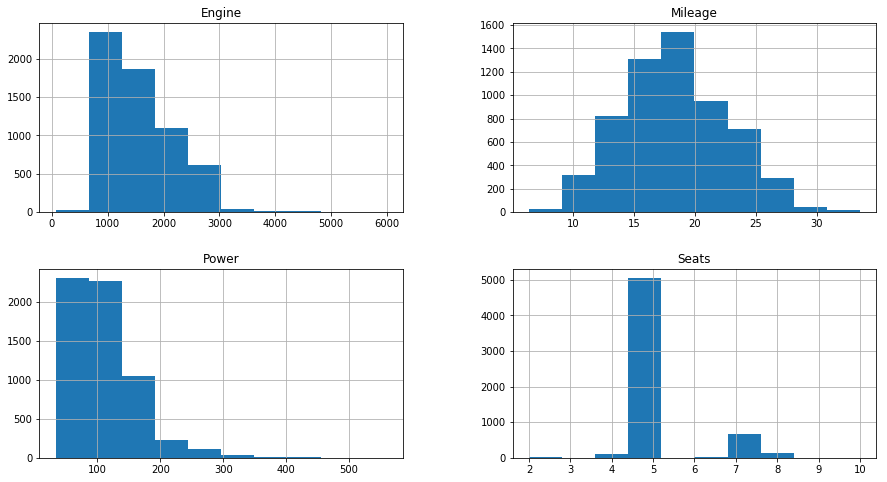

In [0]:
# Univariate visualisation for quantative features
features = ['Mileage', 'Engine','Power','Seats']
training_set[features].hist(figsize=(15, 8));

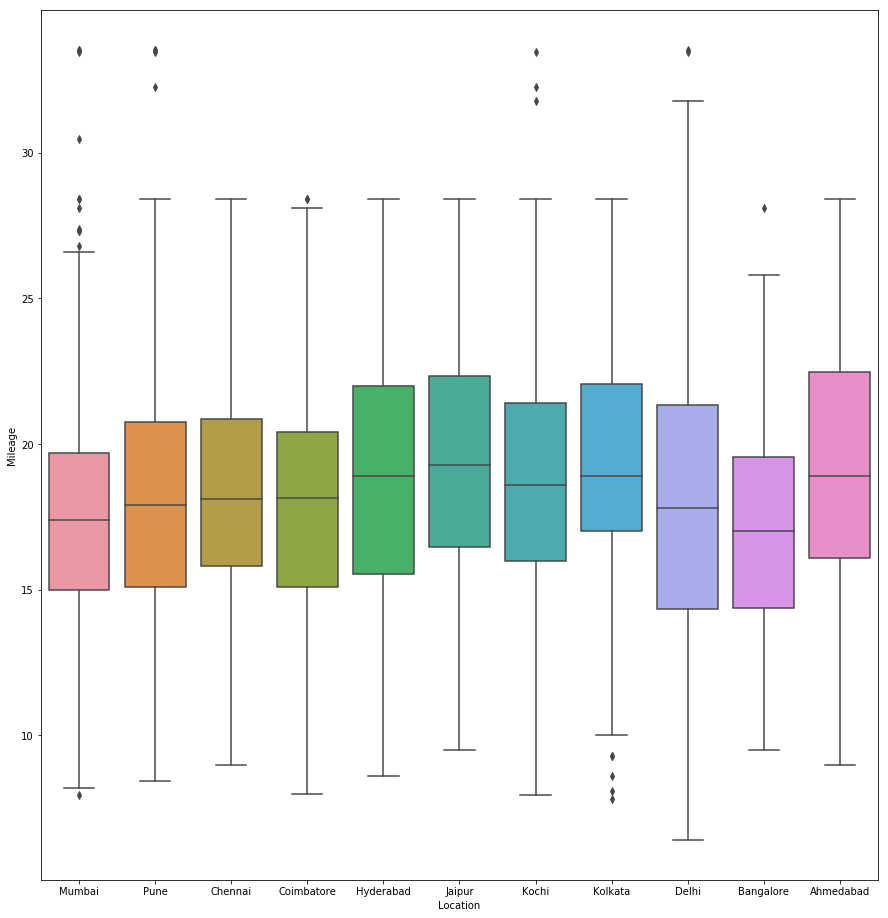

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

#multivariate visualisation for 2 vaariables Location and mileage
plt.figure(figsize=(15,16))
sns.boxplot(x = 'Location', y = 'Mileage', data = training_set) 

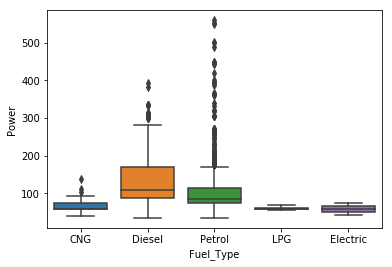

In [0]:
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = training_set) 

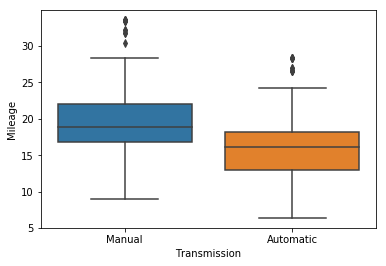

In [0]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = training_set) 

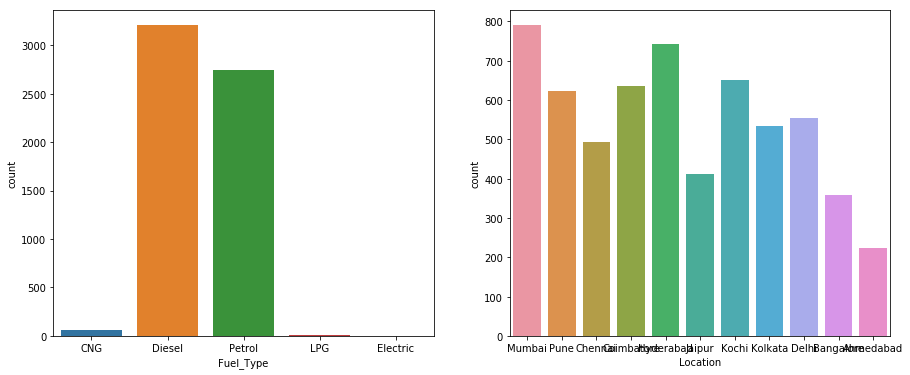

In [0]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.countplot(x='Fuel_Type', data=training_set, ax=axes[0]);
sns.countplot(x='Location', data=training_set, ax=axes[1]);

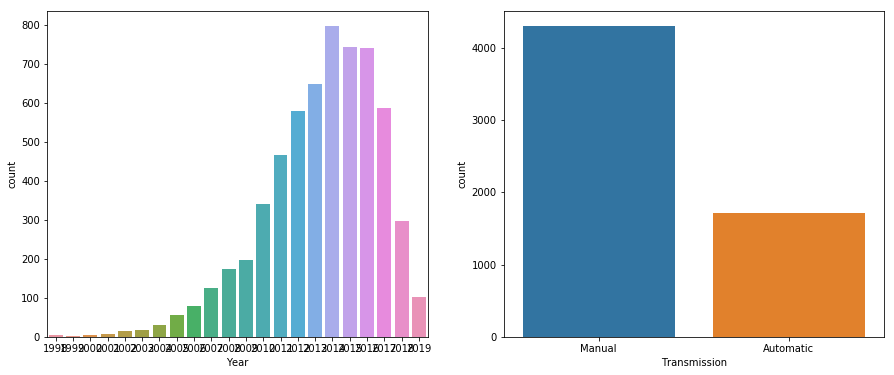

In [0]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.countplot(x='Year', data=training_set, ax=axes[0]);
sns.countplot(x='Transmission', data=training_set, ax=axes[1]);

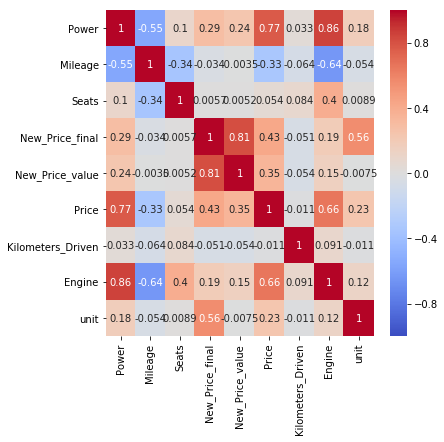

In [0]:
#correlation matrix for numerical variables
# Drop non-numerical variables
numerical = list(set(training_set.columns) - 
                 set(['Location', 'Year', 'Fuel_Type', 
                      'Transmission', 'Owner_Type', 'Brand','Model']))

# Calculate and plot with annotated correlation
corr_matrix = training_set[numerical].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, vmin=-1,
            cmap='coolwarm',
            annot=True);


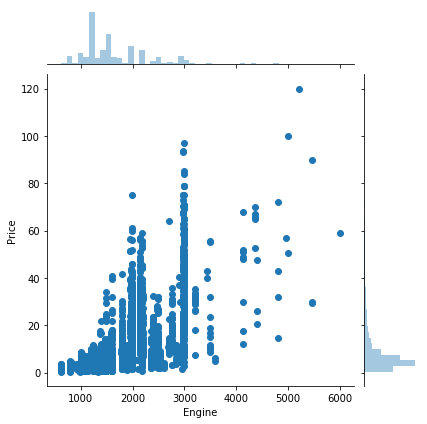

In [0]:
sns.jointplot(x='Engine', y='Price', 
              data=training_set, kind='scatter');

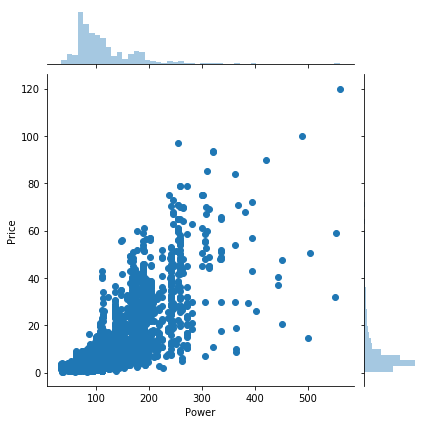

In [0]:
#multivariate visualisation
sns.jointplot(x='Power', y='Price', 
              data=training_set, kind='scatter');

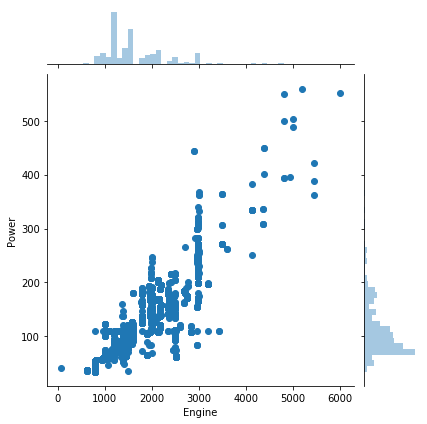

In [0]:
#multivariate visualisation
sns.jointplot(x='Engine', y='Power', 
              data=training_set, kind='scatter');

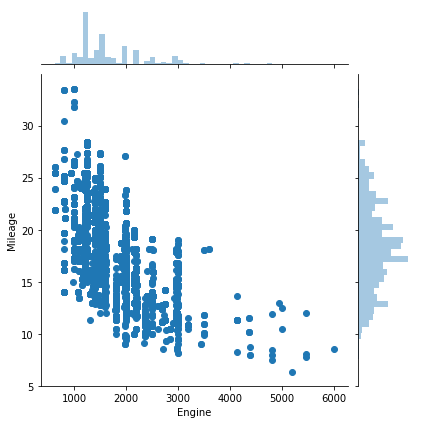

In [0]:
#multivariate visualisation
sns.jointplot(x='Engine', y='Mileage', 
              data=training_set, kind='scatter');

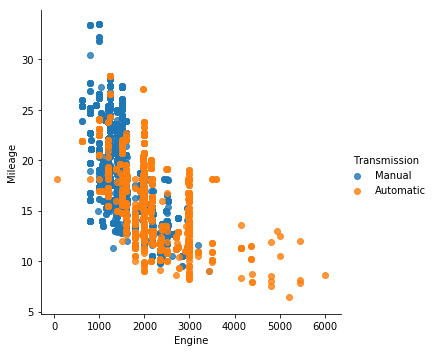

In [0]:
#Quantitative vs. Categorical multivariate visualisation
sns.lmplot('Engine', 'Mileage', data=training_set, hue='Transmission', fit_reg=False);

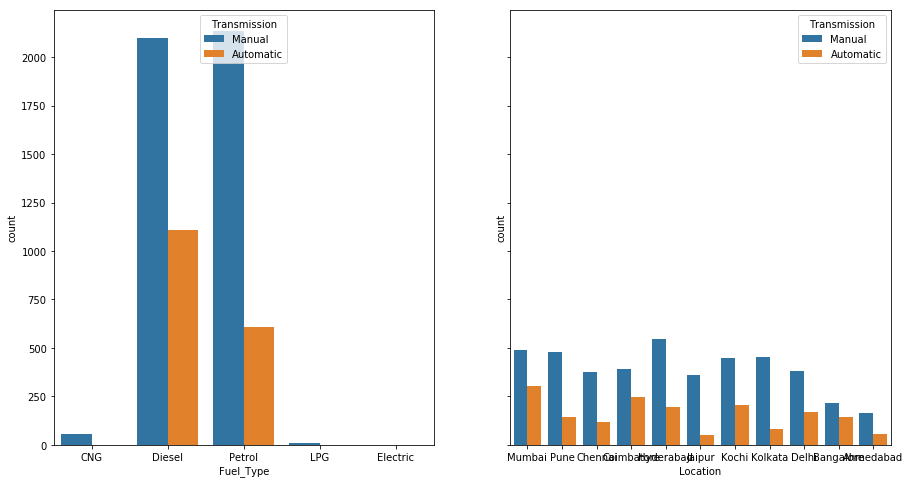

In [0]:
#Categorical vs. Categorical
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

sns.countplot(x='Fuel_Type', hue='Transmission', data=training_set, ax=axes[0]);
sns.countplot(x='Location', hue='Transmission', data=training_set, ax=axes[1]);

In [0]:
#Contingency table : also called a cross tabulation.
#It shows a multivariate frequency distribution of categorical variables in tabular form. 
pd.crosstab(training_set['Brand'], training_set['Transmission']).T

Brand,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Automatic,0,236,267,1,9,0,0,0,39,130,148,1,40,1,1,59,28,99,300,25,6,12,17,18,93,1,11,99,59,20
Manual,1,0,0,0,112,13,28,3,261,478,959,2,0,14,0,1,244,1112,18,1,21,79,1,127,80,0,175,312,256,1


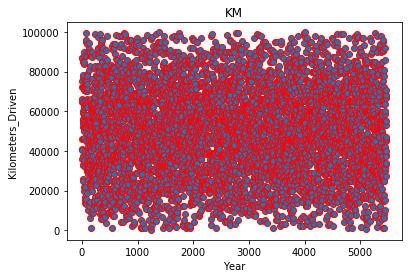

In [0]:
data = training_set[training_set['Kilometers_Driven']<100000]

plt.scatter(np.arange(len(data)), data['Kilometers_Driven'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Kilometers_Driven')
plt.title('KM')
plt.show()

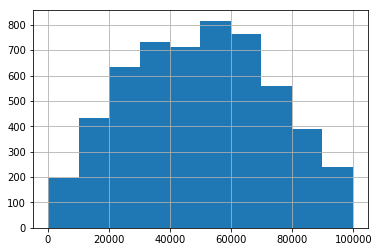

In [0]:
data['Kilometers_Driven'].hist()

In [0]:
training_set.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Model_new,Variant,New_Price_value,New_Price_unit,unit,New_Price_final
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,Wagon,,0.00,NaN,1,0.00
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,Creta,,0.00,NaN,1,0.00
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V,Jazz,,8.61,Lakh,1,8.61
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI,Ertiga,,0.00,NaN,1,0.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,A4,,0.00,NaN,1,0.00


In [0]:
#training_set.head(8)     
training_set['age'] = 2019 - training_set['Year'] 
test_set['age'] = 2019 - test_set['Year']

In [0]:
#training_set_dummy = training_set.copy()

In [0]:
training_set = training_set[training_set['Fuel_Type'] != 'Electric']

In [0]:
training_set = training_set[training_set['Price']<130]

training_set = training_set[training_set['Price']!=2.02]

In [0]:

training_set['age'] = training_set['age'] + 1
test_set['age'] = test_set['age'] + 1

In [0]:
training_set['km_by_age'] = training_set['Kilometers_Driven']/ training_set['age']
test_set['km_by_age'] = test_set['Kilometers_Driven']/ test_set['age']

In [0]:
#training_set[training_set['km_by_age']>100000]

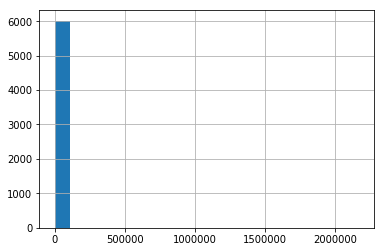

In [0]:
training_set['km_by_age'].hist(bins=20)

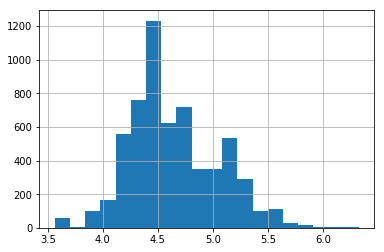

In [0]:
np.log(1+training_set['Power']).hist(bins=20)

In [0]:
#training_set_new['New_Price_final'].hist()


# 1st level Model for New Price 

In [0]:
training_set['Set'] = 'Train'
test_set['Set'] = 'Test'

test_independent = test_set
#train_independent = training_set_dummy

In [0]:
#train_independent

In [0]:
mini_train = training_set.drop('Price',1)

In [0]:
mini_train = pd.concat([mini_train,test_set])

In [0]:
mini_train = mini_train.reset_index()
mini_train = mini_train.drop('index', 1)

In [0]:
#'Brand', 'Model', 'Location','Fuel_Type', 'Transmission', 'Owner_Type'

all_brands = list(set(list(mini_train.Brand)))
all_models = list(set(list(mini_train.Model_new)))
all_locations = list(set(list(mini_train.Location)))
all_fuel_types = list(set(list(mini_train.Fuel_Type)))
all_transmissions = list(set(list(mini_train.Transmission)))
all_owner_types = list(set(list(mini_train.Owner_Type)))

#all_seats = list(set(list(training_set.Seats) + list(test_set.Seats)))

all_year = list(set(list(mini_train.Year)))

In [0]:
#Initializing label encoders
from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()
#le_all_seats = LabelEncoder()
le_all_year = LabelEncoder()

In [0]:
#Fitting the categories
le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)
#le_all_seats.fit(all_seats)
le_all_year.fit(all_year)

LabelEncoder()

In [0]:
#Applying encoding to Training_set data
mini_train['Brand'] = le_brands.transform(mini_train['Brand'])
mini_train['Model_new'] = le_models.transform(mini_train['Model_new'])
mini_train['Location'] = le_locations.transform(mini_train['Location'])
mini_train['Fuel_Type'] = le_fuel_types.transform(mini_train['Fuel_Type'])
mini_train['Transmission'] = le_transmissions.transform(mini_train['Transmission'])
mini_train['Owner_Type'] = le_owner_types.transform(mini_train['Owner_Type'])
#training_set['Seats'] = le_all_seats.transform(training_set['Seats'])
mini_train['Year'] = le_all_year.transform(mini_train['Year'])

In [0]:
#Applying encoding to Training_set data

test_independent['Brand'] = le_brands.transform(test_independent['Brand'])
test_independent['Model_new'] = le_models.transform(test_independent['Model_new'])
test_independent['Location'] = le_locations.transform(test_independent['Location'])
test_independent['Fuel_Type'] = le_fuel_types.transform(test_independent['Fuel_Type'])
test_independent['Transmission'] = le_transmissions.transform(test_independent['Transmission'])
test_independent['Owner_Type'] = le_owner_types.transform(test_independent['Owner_Type'])
#training_set['Seats'] = le_all_seats.transform(training_set['Seats'])
test_independent['Year'] = le_all_year.transform(test_independent['Year'])

In [0]:
#Applying encoding to Training_set data
train_independent['Brand'] = le_brands.transform(train_independent['Brand'])
train_independent['Model_new'] = le_models.transform(train_independent['Model_new'])
train_independent['Location'] = le_locations.transform(train_independent['Location'])
train_independent['Fuel_Type'] = le_fuel_types.transform(train_independent['Fuel_Type'])
train_independent['Transmission'] = le_transmissions.transform(train_independent['Transmission'])
train_independent['Owner_Type'] = le_owner_types.transform(train_independent['Owner_Type'])
#training_set['Seats'] = le_all_seats.transform(training_set['Seats'])
train_independent['Year'] = le_all_year.transform(train_independent['Year'])

In [0]:
df_mini_train = mini_train[mini_train['New_Price_final']>0]
df_mini_test = mini_train[mini_train['New_Price_final']==0]

In [0]:
df_mini_train = df_mini_train[df_mini_train['New_Price_final']<300]

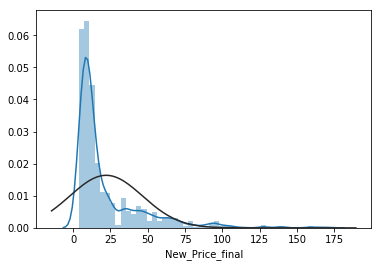

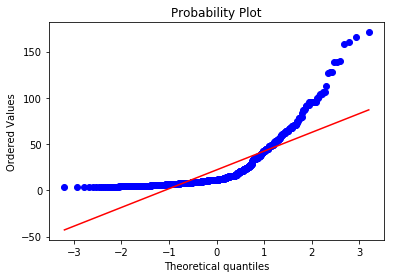

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so pretty!
from scipy import stats # I might use this
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm
sns.distplot(df_mini_train['New_Price_final'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_mini_train['New_Price_final'], plot=plt)

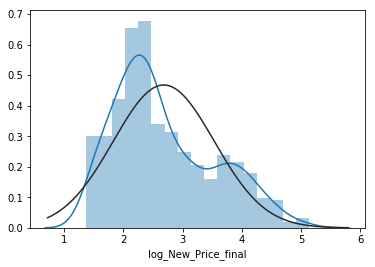

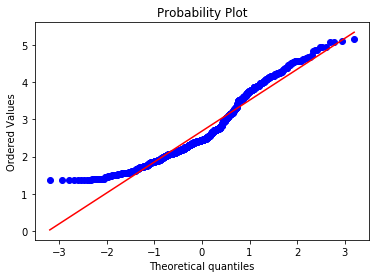

In [0]:
df_mini_train['log_New_Price_final'] = np.log(df_mini_train['New_Price_final'])
sns.distplot(df_mini_train['log_New_Price_final'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_mini_train['log_New_Price_final'], plot=plt)

In [0]:
np.random.seed(88)

def impact_coding(data, feature, target='log_New_Price_final'):
    '''
    In this implementation we get the values and the dictionary as two different steps.
    This is just because initially we were ignoring the dictionary as a result variable.
    
    In this implementation the KFolds use shuffling. If you want reproducibility the cv 
    could be moved to a parameter.
    '''
    n_folds = 20
    n_inner_folds = 10
    impact_coded = pd.Series()
    
    oof_default_mean = data[target].mean() # Gobal mean to use by default (you could further tune this)
    kf = KFold(n_splits=n_folds, shuffle=True)
    oof_mean_cv = pd.DataFrame()
    split = 0
    for infold, oof in kf.split(data[feature]):
            impact_coded_cv = pd.Series()
            kf_inner = KFold(n_splits=n_inner_folds, shuffle=True)
            inner_split = 0
            inner_oof_mean_cv = pd.DataFrame()
            oof_default_inner_mean = data.iloc[infold][target].mean()
            for infold_inner, oof_inner in kf_inner.split(data.iloc[infold]):
                # The mean to apply to the inner oof split (a 1/n_folds % based on the rest)
                oof_mean = data.iloc[infold_inner].groupby(by=feature)[target].mean()
                impact_coded_cv = impact_coded_cv.append(data.iloc[infold].apply(
                            lambda x: oof_mean[x[feature]]
                                      if x[feature] in oof_mean.index
                                      else oof_default_inner_mean
                            , axis=1))

                # Also populate mapping (this has all group -> mean for all inner CV folds)
                inner_oof_mean_cv = inner_oof_mean_cv.join(pd.DataFrame(oof_mean), rsuffix=inner_split, how='outer')
                inner_oof_mean_cv.fillna(value=oof_default_inner_mean, inplace=True)
                inner_split += 1

            # Also populate mapping
            oof_mean_cv = oof_mean_cv.join(pd.DataFrame(inner_oof_mean_cv), rsuffix=split, how='outer')
            oof_mean_cv.fillna(value=oof_default_mean, inplace=True)
            split += 1
            
            impact_coded = impact_coded.append(data.iloc[oof].apply(
                            lambda x: inner_oof_mean_cv.loc[x[feature]].mean()
                                      if x[feature] in inner_oof_mean_cv.index
                                      else oof_default_mean
                            , axis=1))

    return impact_coded, oof_mean_cv.mean(axis=1), oof_default_mean

In [0]:
categorical_features = ['Location', 'Fuel_Type', 'Owner_Type', 'Brand']
impact_coding_map = {}
for f in categorical_features:
    print("Impact coding for {}".format(f))
    df_mini_train["impact_encoded_{}".format(f)], impact_coding_mapping, default_coding = impact_coding(df_mini_train, f)
    impact_coding_map[f] = (impact_coding_mapping, default_coding)
    mapping, default_mean = impact_coding_map[f]
    df_mini_test["impact_encoded_{}".format(f)] = df_mini_test.apply(lambda x: mapping[x[f]]
                                                                         if x[f] in mapping
                                                                         else default_mean
                                                               , axis=1)
    test_independent["impact_encoded_{}".format(f)] = test_independent.apply(lambda x: mapping[x[f]]
                                                                         if x[f] in mapping
                                                                         else default_mean
                                                               , axis=1)
    train_independent["impact_encoded_{}".format(f)] = train_independent.apply(lambda x: mapping[x[f]]
                                                                         if x[f] in mapping
                                                                         else default_mean
                                                               , axis=1)

Impact coding for Location


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Impact coding for Fuel_Type
Impact coding for Owner_Type
Impact coding for Brand


In [0]:
#df_mini_train

In [0]:
mini_training_set_new = df_mini_train[['impact_encoded_Brand','Model', 'impact_encoded_Location', 'Kilometers_Driven', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
      'impact_encoded_Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','age','log_New_Price_final']]

mini_test_set_new = df_mini_test[['impact_encoded_Brand','Model', 'impact_encoded_Location', 'Kilometers_Driven', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
      'impact_encoded_Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','age']]

mini_test_independent = test_independent[['impact_encoded_Brand','Model', 'impact_encoded_Location', 'Kilometers_Driven', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
      'impact_encoded_Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','age']]

In [0]:
mini_training_set_new = df_mini_train[['Brand','Model_new', 'Location', 
                                 'Fuel_Type', 'Transmission',
       'Engine', 'Power', 'Seats','log_New_Price_final']]

mini_test_set_new = df_mini_test[['Brand','Model_new', 'Location', 
                                 'Fuel_Type', 'Transmission',
       'Engine', 'Power', 'Seats']]

mini_test_independent = test_independent[['Brand','Model_new', 'Location', 
                                 'Fuel_Type', 'Transmission',
       'Engine', 'Power', 'Seats']]

In [0]:
mini_train_independent = train_independent[['impact_encoded_Brand','Model', 'impact_encoded_Location', 'Kilometers_Driven', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
      'impact_encoded_Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','age']]

In [0]:
mini_training_set_new = mini_training_set_new[mini_training_set_new['Fuel_Type'] != 'Electric']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
mini_training_set_new = mini_training_set_new[mini_training_set_new['Price']<130]

mini_training_set_new = mini_training_set_new[mini_training_set_new['Price']!=2.02]

In [0]:
# Dependent Variable
Y_train_data = mini_training_set_new.iloc[:, -1].values

# Independent Variables
X_train_data = mini_training_set_new.iloc[:,0 : -1].values

# Independent Variables for test Set
X_test = mini_test_independent.iloc[:,:].values


In [0]:
X_test_from_training = mini_train_independent.iloc[:,:].values

In [0]:
#categorical_features_indices =[0,1,2,4,5,6]
#categorical_features_indices =[0,1,2,4,6]

categorical_features_indices =[0,1,2,3,4]

In [0]:
##### Needed for Stratified KFold ########

bins     = np.linspace(Y_train_data.min(), Y_train_data.max(), 5)
y_binned = np.digitize(Y_train_data, bins)

In [0]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

#X,y=dftrain.drop('loan_default',axis=1),dftrain['loan_default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X_train_data,Y_train_data,test_size=0.2,random_state = 1994)

my_model = XGBRegressor(n_estimators=500, learning_rate=0.075, max_depth = 3,
                        min_child_weight =3, objective="reg:linear", gamma =0, subsample =1, colsample_bytree = 1)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=50, 
             eval_set=[(X_val, y_val)], 
             verbose=False, eval_metric='rmse')

predictions = my_model.predict(X_val)
print("MAE: " + str(mean_absolute_error(predictions, y_val)))
print("MSE: " + str(mean_squared_error(predictions, y_val)))
print("MSLE: " + str(mean_squared_log_error(np.exp(predictions), np.exp(y_val))))

[10:57:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.08591208519359969
MSE: 0.0148879371423768
MSLE: 0.013254179041328121


(-2.3937896671147803, 138.59754266165214)

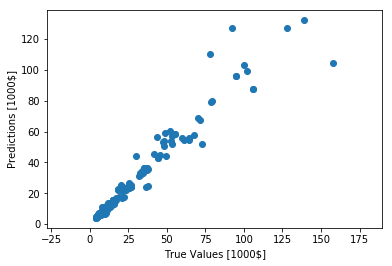

In [0]:
plt.scatter(np.exp(y_val), np.exp(predictions))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

### XGB - Feature Importance

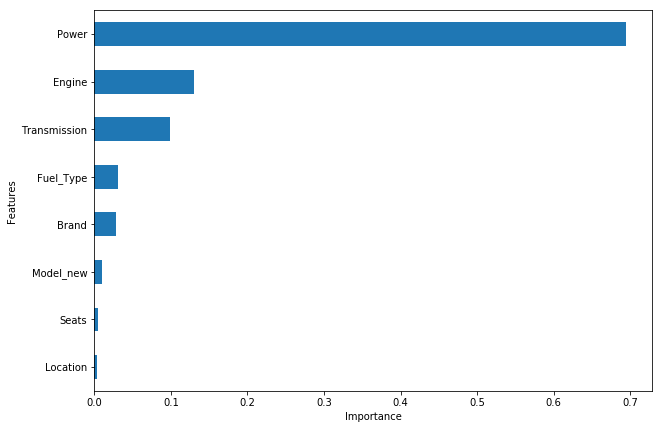

In [0]:
fea_imp = pd.DataFrame({'imp': my_model.feature_importances_, 'col': mini_training_set_new.iloc[:, :-1].columns})
#fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': training_set_new.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
#plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [0]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
#from scipy.stats import skew
#from collections import OrderedDict
from sklearn.model_selection import KFold
RANDOM_STATE = 88

def cross_val(X, y, X_test, n_splits=5):
    kf = KFold(n_splits=5, random_state=None)
    
    acc = []
    predict = None
    Y_pred =[]
    Y_valid =[]
    
    Y_pred_test = []
    
    for tr_ind, val_ind in kf.split(X):
      
      X_train = X[tr_ind]
      y_train = y[tr_ind]

      X_valid = X[val_ind]
      y_valid = y[val_ind]
      
      clf = XGBRegressor(n_estimators=500, learning_rate=0.075, max_depth= 3)
      
      clf.fit(X_train, y_train, 
             early_stopping_rounds=50, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

      y_pred = clf.predict(X_valid)
      Y_pred.append(y_pred)
      Y_valid.append(y_valid)
      
      Y_pred_test.append(clf.predict(X_test))
      
   
    Y_pred = np.concatenate(Y_pred, axis=0)
    Y_valid = np.concatenate(Y_valid, axis=0)
    Y_final_pred_test = np.mean(Y_pred_test, axis=0)
    return Y_pred, Y_valid, Y_final_pred_test

In [0]:
Y_pred_mini, Y_valid_mini, Y_final_pred_test_independent = cross_val(X_train_data, Y_train_data, X_test, n_splits=5)

[10:58:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
Y_pred_mini, Y_valid_mini, Y_final_pred_test_train_independent = cross_val(X_train_data, Y_train_data, X_test_from_training, n_splits=5)

[18:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
np.exp(Y_pred_mini)

array([ 8.54495 , 21.984047, 10.821971, ..., 23.500227, 10.385026,
        7.907201], dtype=float32)

In [0]:
np.exp(Y_valid_mini)

array([ 8.61, 21.  , 10.65, ..., 18.16, 10.57,  7.08])

In [0]:
len(np.exp(Y_final_pred_test_independent))

len(np.exp(Y_final_pred_test_train_independent))

6019

In [0]:
len(Y_final_pred_test_train_independent)

6015

In [0]:
import math
import numpy as np 
def rmsle(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [0]:
1 - rmsle(np.exp(Y_valid_mini), np.exp(Y_pred_mini))

0.8936290905269255

In [0]:
df_mini_test.shape

(6246, 24)

In [0]:
test_independent['New_Price_final_prediction'] = np.exp(Y_final_pred_test_independent)
train_independent['New_Price_final_prediction'] = np.exp(Y_final_pred_test_train_independent)

In [0]:
training_set['New_Price_final'] = np.exp(Y_final_pred_test_train_independent)
test_set['New_Price_final'] = np.exp(Y_final_pred_test_independent)

In [0]:
training_set.to_excel('training_set_new.xlsx', index=False)
test_set.to_excel('test_set_new.xlsx', index=False)

In [0]:
uploaded = drive.CreateFile({'title': "training_set_new.xlsx"})
uploaded.SetContentFile("training_set_new.xlsx")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1pfSWMAGDxWXcZ_hcZGWcYy9dwtlCasHq


In [0]:
uploaded = drive.CreateFile({'title': "test_set_new.xlsx"})
uploaded.SetContentFile("test_set_new.xlsx")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1R2YuYBRPClJjBV2_TdIZ7O17TmoyNFZS


# Modeling

In [0]:
#'Brand', 'Model', 'Location','Fuel_Type', 'Transmission', 'Owner_Type'

all_brands = list(set(list(training_set.Brand) + list(test_set.Brand)))
all_models = list(set(list(training_set.Model_new) + list(test_set.Model_new)))
all_locations = list(set(list(training_set.Location) + list(test_set.Location)))
all_fuel_types = list(set(list(training_set.Fuel_Type) + list(test_set.Fuel_Type)))
all_transmissions = list(set(list(training_set.Transmission) + list(test_set.Transmission)))
all_owner_types = list(set(list(training_set.Owner_Type) + list(test_set.Owner_Type)))

#all_seats = list(set(list(training_set.Seats) + list(test_set.Seats)))

all_year = list(set(list(training_set.Year) + list(test_set.Year)))

## Label Encoding for categorical variables

In [0]:
#Initializing label encoders
from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()
#le_all_seats = LabelEncoder()
le_all_year = LabelEncoder()

In [0]:
#Fitting the categories
le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)
#le_all_seats.fit(all_seats)
le_all_year.fit(all_year)

LabelEncoder()

In [0]:
#Applying encoding to Training_set data
training_set['Brand'] = le_brands.transform(training_set['Brand'])
training_set['Model_new'] = le_models.transform(training_set['Model_new'])
training_set['Location'] = le_locations.transform(training_set['Location'])
training_set['Fuel_Type'] = le_fuel_types.transform(training_set['Fuel_Type'])
training_set['Transmission'] = le_transmissions.transform(training_set['Transmission'])
training_set['Owner_Type'] = le_owner_types.transform(training_set['Owner_Type'])
#training_set['Seats'] = le_all_seats.transform(training_set['Seats'])
training_set['Year'] = le_all_year.transform(training_set['Year'])

In [0]:
#Applying encoding to Test_set data
test_set['Brand'] = le_brands.transform(test_set['Brand'])
test_set['Model_new'] = le_models.transform(test_set['Model_new'])
test_set['Location'] = le_locations.transform(test_set['Location'])
test_set['Fuel_Type'] = le_fuel_types.transform(test_set['Fuel_Type'])
test_set['Transmission'] = le_transmissions.transform(test_set['Transmission'])
test_set['Owner_Type'] = le_owner_types.transform(test_set['Owner_Type'])
#test_set['Seats'] = le_all_seats.transform(test_set['Seats'])
test_set['Year'] = le_all_year.transform(test_set['Year'])

## Creating Train and Test data

###Making Y variable normally distributed by taking log

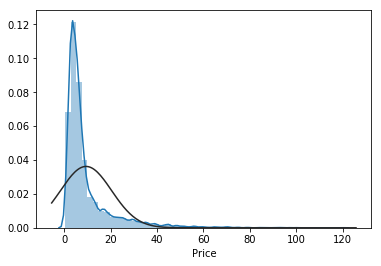

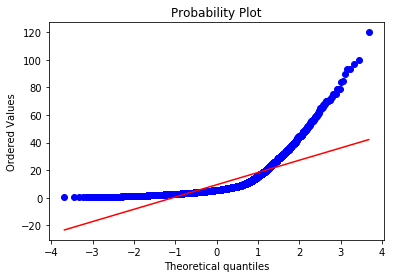

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so pretty!
from scipy import stats # I might use this
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm
sns.distplot(training_set['Price'],fit=norm);
fig = plt.figure()
res = stats.probplot(training_set['Price'], plot=plt)

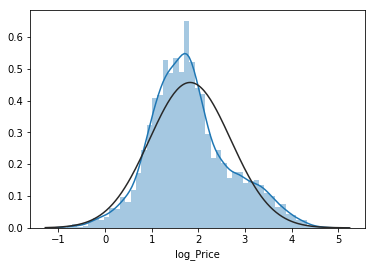

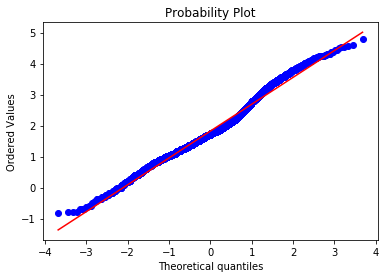

In [0]:
training_set['log_Price'] = np.log(training_set['Price'])
sns.distplot(training_set['log_Price'],fit=norm);
fig = plt.figure()
res = stats.probplot(training_set['log_Price'], plot=plt)

## Mean Encoding

In [0]:
training_set.loc[training_set['New_Price_value']!=0, 'New_Price_final_predicted'] = training_set.loc[training_set['New_Price_value']!=0, 'New_Price_value']  

test_set.loc[test_set['New_Price_value']!=0, 'New_Price_final_predicted'] = test_set.loc[test_set['New_Price_value']!=0, 'New_Price_value']  


In [0]:
df_train = training_set.copy()
df_test = test_set.copy()

In [0]:
np.random.seed(13)

def impact_coding(data, feature, target='log_Price'):
    '''
    In this implementation we get the values and the dictionary as two different steps.
    This is just because initially we were ignoring the dictionary as a result variable.
    
    In this implementation the KFolds use shuffling. If you want reproducibility the cv 
    could be moved to a parameter.
    '''
    n_folds = 20
    n_inner_folds = 10
    impact_coded = pd.Series()
    
    oof_default_mean = data[target].mean() # Gobal mean to use by default (you could further tune this)
    kf = KFold(n_splits=n_folds, shuffle=True)
    oof_mean_cv = pd.DataFrame()
    split = 0
    for infold, oof in kf.split(data[feature]):
            impact_coded_cv = pd.Series()
            kf_inner = KFold(n_splits=n_inner_folds, shuffle=True)
            inner_split = 0
            inner_oof_mean_cv = pd.DataFrame()
            oof_default_inner_mean = data.iloc[infold][target].mean()
            for infold_inner, oof_inner in kf_inner.split(data.iloc[infold]):
                # The mean to apply to the inner oof split (a 1/n_folds % based on the rest)
                oof_mean = data.iloc[infold_inner].groupby(by=feature)[target].mean()
                impact_coded_cv = impact_coded_cv.append(data.iloc[infold].apply(
                            lambda x: oof_mean[x[feature]]
                                      if x[feature] in oof_mean.index
                                      else oof_default_inner_mean
                            , axis=1))

                # Also populate mapping (this has all group -> mean for all inner CV folds)
                inner_oof_mean_cv = inner_oof_mean_cv.join(pd.DataFrame(oof_mean), rsuffix=inner_split, how='outer')
                inner_oof_mean_cv.fillna(value=oof_default_inner_mean, inplace=True)
                inner_split += 1

            # Also populate mapping
            oof_mean_cv = oof_mean_cv.join(pd.DataFrame(inner_oof_mean_cv), rsuffix=split, how='outer')
            oof_mean_cv.fillna(value=oof_default_mean, inplace=True)
            split += 1
            
            impact_coded = impact_coded.append(data.iloc[oof].apply(
                            lambda x: inner_oof_mean_cv.loc[x[feature]].mean()
                                      if x[feature] in inner_oof_mean_cv.index
                                      else oof_default_mean
                            , axis=1))

    return impact_coded, oof_mean_cv.mean(axis=1), oof_default_mean


In [0]:
# Apply the encoding to training and test data, and preserve the mapping

categorical_features = ['Location', 'Fuel_Type', 'Owner_Type', 'Brand']
impact_coding_map = {}
for f in categorical_features:
    print("Impact coding for {}".format(f))
    df_train["impact_encoded_{}".format(f)], impact_coding_mapping, default_coding = impact_coding(df_train, f)
    impact_coding_map[f] = (impact_coding_mapping, default_coding)
    mapping, default_mean = impact_coding_map[f]
    df_test["impact_encoded_{}".format(f)] = df_test.apply(lambda x: mapping[x[f]]
                                                                         if x[f] in mapping
                                                                         else default_mean
                                                               , axis=1)

Impact coding for Location
Impact coding for Fuel_Type
Impact coding for Owner_Type
Impact coding for Brand


In [0]:
df_train = df_train[df_train['Model_new'].isin(df_test['Model_new'])]
df_train = df_train.reset_index()
df_train = df_train.drop('index',1)

In [0]:

##### Impact Encoding ######################

training_set_new = df_train[['impact_encoded_Brand','Model', 'impact_encoded_Location', 'Kilometers_Driven', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
      'impact_encoded_Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','age','New_Price_final_predicted','log_Price']]

test_set_new = df_test[['impact_encoded_Brand','Model', 'impact_encoded_Location', 'Kilometers_Driven', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
      'impact_encoded_Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','age', 'New_Price_final_predicted']]

In [0]:
training_set_new = df_train[['impact_encoded_Brand', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
       'Mileage', 'Engine', 'Power','log_New_Price_final']]

test_set_new = df_test[['impact_encoded_Brand', 
                                 'impact_encoded_Fuel_Type', 'Transmission',
       'Mileage', 'Engine', 'Power']]

In [0]:
df_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Model_new,Variant,New_Price_value,New_Price_unit,unit,New_Price_final,age,km_by_age,log_Price
0,9,13,72000,0,1,0,26.600000,998.0,58.16,5.0,NaN,1.75,18,Wagon R LXI CNG,194,,0.00,NaN,1,0.00,10,7200.000000,0.559616
1,10,18,41000,1,1,0,19.670000,1582.0,126.20,5.0,NaN,12.50,11,Creta 1.6 CRDi SX Option,56,,0.00,NaN,1,0.00,5,8200.000000,2.525729
2,2,14,46000,3,1,0,18.200000,1199.0,88.70,5.0,8.61 Lakh,4.50,10,Jazz V,102,,8.61,Lakh,1,8.61,9,5111.111111,1.504077
3,2,15,87000,1,1,0,20.770000,1248.0,88.76,7.0,NaN,6.00,18,Ertiga VDI,71,,0.00,NaN,1,0.00,8,10875.000000,1.791759
4,3,16,40670,1,0,2,15.200000,1968.0,140.80,5.0,NaN,17.74,1,A4 New 2.0 TDI Multitronic,12,,0.00,NaN,1,0.00,7,5810.000000,2.875822
5,5,15,75000,2,1,0,21.100000,814.0,55.20,5.0,NaN,2.35,11,EON LPG Era Plus Option,63,,0.00,NaN,1,0.00,8,9375.000000,0.854415
6,6,16,86999,1,1,0,23.080000,1461.0,63.10,5.0,NaN,3.50,22,Micra Diesel XV,118,,0.00,NaN,1,0.00,7,12428.428571,1.252763
7,9,19,36000,1,0,0,11.360000,2755.0,171.50,8.0,21 Lakh,17.50,29,Innova Crysta 2.8 GX AT 8S,101,,21.00,Lakh,1,21.00,4,9000.000000,2.862201
8,10,16,64430,1,1,0,20.540000,1598.0,103.60,5.0,NaN,5.20,30,Vento Diesel Comfortline,186,,0.00,NaN,1,0.00,7,9204.285714,1.648659
9,2,15,65932,1,1,2,22.300000,1248.0,74.00,5.0,NaN,1.95,28,Indica Vista Quadrajet LS,99,,0.00,NaN,1,0.00,8,8241.500000,0.667829


In [0]:
#Re-ordering the columns

training_set_new = df_train[['Brand','Model_new', 'Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power','age','log_Price']]
test_set_new = df_test[['Brand', 'Model_new','Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power','age']]

#'Model', 'age', 'km_per_mileage''Year'

In [0]:
training_set_new = training_set[['Brand','Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'log_Price']]
test_set = test_set[['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power']]

#  Model, Seats

In [0]:
training_set_new = training_set_new[training_set_new['Kilometers_Driven']<100000]

In [0]:
training_set_new['Kilometers_Driven'] = np.log(1+training_set_new['Kilometers_Driven'])
training_set_new['Power'] = np.log(1+training_set_new['Power'])
training_set_new['Engine'] = np.log(1+training_set_new['Engine'])
#training_set_new['New_Price_final'] = np.log(1+training_set_new['New_Price_final'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
test_set_new['Kilometers_Driven'] = np.log(1+test_set_new['Kilometers_Driven'])
test_set_new['Power'] = np.log(1+test_set_new['Power'])
test_set_new['Engine'] = np.log(1+test_set_new['Engine'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
# Dependent Variable
Y_train_data = training_set_new.iloc[:, -1].values

# Independent Variables
X_train_data = training_set_new.iloc[:,0 : -1].values

# Independent Variables for test Set
X_test = test_set_new.iloc[:,:].values

In [0]:
categorical_features_indices =[0,1,2,4,5,6]
#categorical_features_indices =[0,1,2,4,6]

#categorical_features_indices =[1]

In [0]:
##### Needed for Stratified KFold ########

bins     = np.linspace(Y_train_data.min(), Y_train_data.max(), 30)
y_binned = np.digitize(Y_train_data, bins)

In [0]:
#training_set['Seats'].value_counts()

2    5055
4     674
5     134
1      99
3      31
0      16
7       5
6       3
Name: Seats, dtype: int64

In [0]:
import collections

collections.Counter(y_binned)

Counter({1: 14,
         2: 27,
         3: 70,
         4: 134,
         5: 209,
         6: 526,
         7: 843,
         8: 952,
         9: 1026,
         10: 691,
         11: 403,
         12: 334,
         13: 270,
         14: 245,
         15: 159,
         16: 75,
         17: 32,
         18: 5,
         19: 1,
         20: 1})

In [0]:
!pip install catboost

     |████████████████████████████████| 61.2MB 66.6MB/s 


In [0]:
from sklearn.model_selection import train_test_split

## XGB Regressor

In [0]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

#X,y=dftrain.drop('loan_default',axis=1),dftrain['loan_default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X_train_data,Y_train_data,test_size=0.05,random_state = 1994)

my_model = XGBRegressor(n_estimators=10000, learning_rate=0.075, max_depth = 3,
                        min_child_weight =3, objective="reg:linear", gamma =0, subsample =1, colsample_bytree = 1)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=500, 
             eval_set=[(X_val, y_val)], 
             verbose=False, eval_metric='rmse')

predictions = my_model.predict(X_val)
print("MAE: " + str(mean_absolute_error(predictions, y_val)))
print("MSE: " + str(mean_squared_error(predictions, y_val)))
print("MSLE: " + str(mean_squared_log_error(np.exp(predictions), np.exp(y_val))))

(-3.4502681048961135, 83.11723984800295)

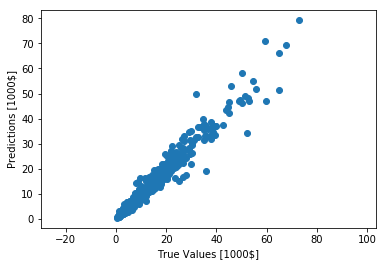

In [0]:
plt.scatter(np.exp(y_val), np.exp(predictions))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

### XGB - Feature Importance

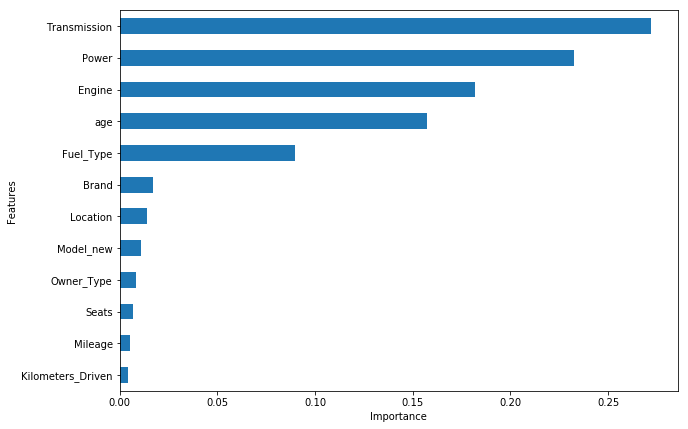

In [0]:
fea_imp = pd.DataFrame({'imp': my_model.feature_importances_, 'col': training_set_new.iloc[:, :-1].columns})
#fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': training_set_new.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
#plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [0]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
clf=RandomForestRegressor()
clf.fit(X_train,y_train)
clf.score(X_val,y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9507436710777023

In [0]:
my_model.score(X_val,y_val)

0.9688042349430485

In [0]:
model.score(X_val,y_val)

0.15707049085765437

## Stratified - KFold

In [0]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
#from scipy.stats import skew
#from collections import OrderedDict

RANDOM_STATE = 88

def cross_val(X, y, X_test, n_splits=20):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    
    acc = []
    predict = None
    Y_pred =[]
    Y_valid =[]
    
    Y_pred_test = []
    
    for tr_ind, val_ind in skf.split(X,y_binned):
      
      X_train = X[tr_ind]
      y_train = y[tr_ind]

      X_valid = X[val_ind]
      y_valid = y[val_ind]

      #clf = CatBoostClassifier(iterations=500,
      #                        loss_function = param['loss_function'],
      #                        depth=param['depth'],
      #                       l2_leaf_reg = param['l2_leaf_reg'],
      #                        eval_metric = 'Accuracy',
      #                        leaf_estimation_iterations = 10,
      #                        use_best_model=True,
      #                        logging_level='Silent'
      #)

      #clf = CatBoostRegressor(iterations=5000,
      #                  learning_rate=0.03,
      #                 depth=3, loss_function='RMSE',
      #                       bagging_temperature = 0.2,
      #                       od_type='Iter',
      #                       metric_period = 75,
      #                       od_wait=100)
   
      
      #clf.fit(X_train, 
       #       y_train,
       #       cat_features=cat_features,
       #       eval_set=(X_valid, y_valid),use_best_model=True, plot=True)
      
      clf = XGBRegressor(n_estimators=10000, learning_rate=0.075, max_depth= 3, min_child_weight =1)
      
      clf.fit(X_train, y_train, 
             early_stopping_rounds=500, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
      
      

      y_pred = clf.predict(X_valid)
      #accuracy = accuracy_score(y_valid, y_pred)
      #acc.append(accuracy)
      Y_pred.append(y_pred)
      Y_valid.append(y_valid)
      
      Y_pred_test.append(clf.predict(X_test))
      
    
    #return sum(acc)/n_splits
    Y_pred = np.concatenate(Y_pred, axis=0)
    Y_valid = np.concatenate(Y_valid, axis=0)
    Y_final_pred_test = np.mean(Y_pred_test, axis=0)
    return Y_pred, Y_valid, Y_final_pred_test  

In [0]:
X_train_data.shape

(6019, 13)

In [0]:
X_test.shape

(1234, 13)

In [0]:
Y_pred, Y_valid, Y_final_pred_test = cross_val(X_train_data, Y_train_data, X_test, n_splits=20)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[10:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [0]:
np.exp(Y_pred)

array([ 3.08919808,  4.65301802,  4.91719346, ..., 19.92324279,
        2.08410201,  7.44118011])

In [0]:
np.exp(Y_valid)

array([ 3.5 ,  4.49,  5.6 , ..., 16.52,  2.96,  7.43])

In [0]:
np.exp(Y_final_pred_test)

array([ 2.6482542,  2.8954647, 16.8512   , ...,  2.9744823,  4.7739573,
       20.154959 ], dtype=float32)

In [0]:
np.exp(Y_final_pred_test)

array([ 2.6941133,  2.6745944, 16.169336 , ...,  2.916884 ,  4.576144 ,
       20.972248 ], dtype=float32)

In [0]:
import math
import numpy as np 
def rmsle(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [0]:
1 - rmsle(np.exp(Y_valid), np.exp(Y_pred))

0.8689096060785189

In [0]:
mini_model_data = pd.concat([df_train, df_test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
mini_model_data = mini_model_data.reset_index()
mini_model_data = mini_model_data.drop('index', 1)

## CB - Stratified - KFold

In [0]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor

import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
#from scipy.stats import skew
#from collections import OrderedDict

RANDOM_STATE = 88

def cross_val(X, y, X_test, n_splits=20):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    
    acc = []
    predict = None
    Y_pred =[]
    Y_valid =[]
    
    Y_pred_test = []
    
    for tr_ind, val_ind in skf.split(X,y_binned):
      
      X_train = X[tr_ind]
      y_train = y[tr_ind]

      X_valid = X[val_ind]
      y_valid = y[val_ind]

      clf =  CatBoostRegressor(iterations=10000,
                             learning_rate=0.085,
                             depth=3,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 1000,
                             od_wait=100)
      clf.fit(X_train, y_train,
                 eval_set=(X_valid, y_valid),early_stopping_rounds=1000,
                 cat_features=categorical_features_indices,
                 use_best_model=True)
    

      y_pred = clf.predict(X_valid)
      #accuracy = accuracy_score(y_valid, y_pred)
      #acc.append(accuracy)
      Y_pred.append(y_pred)
      Y_valid.append(y_valid)
      
      Y_pred_test.append(clf.predict(X_test))
      
    
    #return sum(acc)/n_splits
    Y_pred = np.concatenate(Y_pred, axis=0)
    Y_valid = np.concatenate(Y_valid, axis=0)
    Y_final_pred_test = np.mean(Y_pred_test, axis=0)
    return Y_pred, Y_valid, Y_final_pred_test  

In [0]:
X_train_data.shape

(6019, 13)

In [0]:
X_test.shape

(1234, 13)

In [0]:
Y_pred_cb, Y_valid_cb, Y_final_pred_test_cb = cross_val(X_train_data, Y_train_data, X_test, n_splits=20)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


0:	learn: 1.8698407	test: 1.8561380	best: 1.8561380 (0)	total: 57.2ms	remaining: 9m 31s
1000:	learn: 0.1798101	test: 0.1822124	best: 0.1820865 (709)	total: 7.33s	remaining: 1m 5s
2000:	learn: 0.1705333	test: 0.1757752	best: 0.1757691 (1994)	total: 14.5s	remaining: 57.9s
3000:	learn: 0.1625214	test: 0.1717131	best: 0.1717083 (2997)	total: 21.7s	remaining: 50.7s
4000:	learn: 0.1581857	test: 0.1686021	best: 0.1685779 (3920)	total: 28.9s	remaining: 43.4s
5000:	learn: 0.1543654	test: 0.1659787	best: 0.1659603 (4994)	total: 36.2s	remaining: 36.2s
6000:	learn: 0.1524328	test: 0.1648798	best: 0.1648798 (6000)	total: 43.4s	remaining: 28.9s
7000:	learn: 0.1502090	test: 0.1644419	best: 0.1644215 (6582)	total: 50.5s	remaining: 21.6s
8000:	learn: 0.1482750	test: 0.1630294	best: 0.1630267 (7996)	total: 57.8s	remaining: 14.4s
9000:	learn: 0.1469490	test: 0.1632226	best: 0.1627167 (8341)	total: 1m 4s	remaining: 7.2s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1627167055
bestI

1000:	learn: 0.1786709	test: 0.1872362	best: 0.1871898 (951)	total: 7.24s	remaining: 1m 5s
2000:	learn: 0.1679944	test: 0.1839419	best: 0.1838523 (1926)	total: 14.4s	remaining: 57.5s
3000:	learn: 0.1621372	test: 0.1837650	best: 0.1830236 (2567)	total: 21.6s	remaining: 50.3s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1830236245
bestIteration = 2567

Shrink model to first 2568 iterations.
0:	learn: 1.8698289	test: 1.8680242	best: 1.8680242 (0)	total: 8.52ms	remaining: 1m 25s


1000:	learn: 0.1796703	test: 0.1977354	best: 0.1976918 (970)	total: 7.48s	remaining: 1m 7s
2000:	learn: 0.1657913	test: 0.1886012	best: 0.1885970 (1995)	total: 14.8s	remaining: 59.4s
3000:	learn: 0.1580146	test: 0.1860978	best: 0.1860843 (2996)	total: 22.3s	remaining: 51.9s
4000:	learn: 0.1542692	test: 0.1854414	best: 0.1852976 (3907)	total: 29.5s	remaining: 44.2s
5000:	learn: 0.1510741	test: 0.1840022	best: 0.1836367 (4702)	total: 36.8s	remaining: 36.8s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1836367083
bestIteration = 4702

Shrink model to first 4703 iterations.
0:	learn: 1.8680474	test: 1.8537083	best: 1.8537083 (0)	total: 10.5ms	remaining: 1m 44s


1000:	learn: 0.1758854	test: 0.1862335	best: 0.1862152 (991)	total: 7.59s	remaining: 1m 8s
2000:	learn: 0.1642946	test: 0.1780768	best: 0.1780768 (2000)	total: 14.9s	remaining: 59.6s
3000:	learn: 0.1604306	test: 0.1752281	best: 0.1752270 (2998)	total: 22.1s	remaining: 51.6s
4000:	learn: 0.1552383	test: 0.1714871	best: 0.1714677 (3993)	total: 29.3s	remaining: 44s
5000:	learn: 0.1517408	test: 0.1690452	best: 0.1689925 (4967)	total: 36.6s	remaining: 36.6s
6000:	learn: 0.1489326	test: 0.1669389	best: 0.1669389 (6000)	total: 43.9s	remaining: 29.2s
7000:	learn: 0.1456504	test: 0.1650265	best: 0.1650242 (6997)	total: 51.2s	remaining: 21.9s
8000:	learn: 0.1443110	test: 0.1636873	best: 0.1636795 (7960)	total: 58.2s	remaining: 14.6s
9000:	learn: 0.1424373	test: 0.1634748	best: 0.1634266 (8831)	total: 1m 5s	remaining: 7.27s
9999:	learn: 0.1405151	test: 0.1627027	best: 0.1626797 (9986)	total: 1m 12s	remaining: 0us

bestTest = 0.1626797216
bestIteration = 9986

Shrink model to first 9987 iterations

0:	learn: 1.8673353	test: 1.8723200	best: 1.8723200 (0)	total: 15.9ms	remaining: 2m 39s
1000:	learn: 0.1874925	test: 0.2010069	best: 0.2009242 (999)	total: 7.5s	remaining: 1m 7s
2000:	learn: 0.1735368	test: 0.1938418	best: 0.1938418 (2000)	total: 14.7s	remaining: 58.6s
3000:	learn: 0.1668220	test: 0.1911682	best: 0.1911130 (2984)	total: 21.9s	remaining: 51.2s
4000:	learn: 0.1619939	test: 0.1900146	best: 0.1895892 (3788)	total: 29.1s	remaining: 43.6s
5000:	learn: 0.1570819	test: 0.1878594	best: 0.1877905 (4965)	total: 36.4s	remaining: 36.4s
6000:	learn: 0.1542893	test: 0.1868354	best: 0.1868048 (5912)	total: 43.7s	remaining: 29.1s
7000:	learn: 0.1519271	test: 0.1862931	best: 0.1862517 (6714)	total: 50.9s	remaining: 21.8s
8000:	learn: 0.1501304	test: 0.1855590	best: 0.1855532 (7990)	total: 58s	remaining: 14.5s
9000:	learn: 0.1484191	test: 0.1842953	best: 0.1842884 (8999)	total: 1m 5s	remaining: 7.27s
9999:	learn: 0.1469938	test: 0.1833702	best: 0.1833000 (9766)	total: 1m 12s	remaining: 0

1000:	learn: 0.1777459	test: 0.1770521	best: 0.1770521 (1000)	total: 7.44s	remaining: 1m 6s
2000:	learn: 0.1682120	test: 0.1727631	best: 0.1726999 (1931)	total: 14.6s	remaining: 58.5s
3000:	learn: 0.1635504	test: 0.1719178	best: 0.1718130 (2918)	total: 21.8s	remaining: 50.8s
4000:	learn: 0.1585293	test: 0.1720878	best: 0.1717036 (3639)	total: 28.9s	remaining: 43.3s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1717035518
bestIteration = 3639

Shrink model to first 3640 iterations.
0:	learn: 1.8682851	test: 1.8716462	best: 1.8716462 (0)	total: 9ms	remaining: 1m 30s


1000:	learn: 0.1804752	test: 0.2087349	best: 0.2085742 (991)	total: 7.44s	remaining: 1m 6s
2000:	learn: 0.1664236	test: 0.2023966	best: 0.2023966 (2000)	total: 14.9s	remaining: 59.4s
3000:	learn: 0.1605886	test: 0.2001661	best: 0.1996214 (2431)	total: 22.2s	remaining: 51.8s
4000:	learn: 0.1567256	test: 0.1966665	best: 0.1966665 (4000)	total: 29.6s	remaining: 44.4s
5000:	learn: 0.1533478	test: 0.1933085	best: 0.1933085 (5000)	total: 36.8s	remaining: 36.8s
6000:	learn: 0.1491814	test: 0.1922323	best: 0.1921729 (5965)	total: 44s	remaining: 29.3s
7000:	learn: 0.1468039	test: 0.1930393	best: 0.1918720 (6391)	total: 51.2s	remaining: 21.9s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1918719782
bestIteration = 6391

Shrink model to first 6392 iterations.
0:	learn: 1.8674744	test: 1.8697200	best: 1.8697200 (0)	total: 10.1ms	remaining: 1m 40s


1000:	learn: 0.1724168	test: 0.2003234	best: 0.2002382 (996)	total: 7.42s	remaining: 1m 6s
2000:	learn: 0.1628813	test: 0.1936459	best: 0.1934993 (1970)	total: 14.7s	remaining: 58.9s
3000:	learn: 0.1576675	test: 0.1901196	best: 0.1900831 (2944)	total: 22.2s	remaining: 51.9s
4000:	learn: 0.1545659	test: 0.1889913	best: 0.1888963 (3848)	total: 29.4s	remaining: 44.1s
5000:	learn: 0.1511864	test: 0.1878154	best: 0.1876270 (4651)	total: 36.8s	remaining: 36.8s
6000:	learn: 0.1486018	test: 0.1870291	best: 0.1869603 (5899)	total: 44.1s	remaining: 29.4s
7000:	learn: 0.1465646	test: 0.1854371	best: 0.1853807 (6983)	total: 51.4s	remaining: 22s
8000:	learn: 0.1435998	test: 0.1834247	best: 0.1833963 (7997)	total: 58.6s	remaining: 14.6s
9000:	learn: 0.1417008	test: 0.1820046	best: 0.1818536 (8994)	total: 1m 6s	remaining: 7.33s
9999:	learn: 0.1392989	test: 0.1809709	best: 0.1809305 (9958)	total: 1m 13s	remaining: 0us

bestTest = 0.1809304757
bestIteration = 9958

Shrink model to first 9959 iterations

0:	learn: 1.8677039	test: 1.8838449	best: 1.8838449 (0)	total: 8.97ms	remaining: 1m 29s
1000:	learn: 0.1792511	test: 0.1931979	best: 0.1931979 (1000)	total: 7.54s	remaining: 1m 7s
2000:	learn: 0.1671088	test: 0.1859363	best: 0.1859333 (1998)	total: 15s	remaining: 59.9s
3000:	learn: 0.1634293	test: 0.1844992	best: 0.1840898 (2657)	total: 22.1s	remaining: 51.4s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1840897683
bestIteration = 2657

Shrink model to first 2658 iterations.
0:	learn: 1.8635363	test: 1.8879810	best: 1.8879810 (0)	total: 8.84ms	remaining: 1m 28s


1000:	learn: 0.1841542	test: 0.1866047	best: 0.1865445 (999)	total: 7.39s	remaining: 1m 6s
2000:	learn: 0.1760154	test: 0.1821132	best: 0.1819024 (1926)	total: 14.6s	remaining: 58.3s
3000:	learn: 0.1696281	test: 0.1785412	best: 0.1784450 (2987)	total: 21.7s	remaining: 50.7s
4000:	learn: 0.1658531	test: 0.1757079	best: 0.1756972 (3977)	total: 28.9s	remaining: 43.3s
5000:	learn: 0.1621124	test: 0.1738713	best: 0.1738140 (4995)	total: 36.2s	remaining: 36.2s
6000:	learn: 0.1597946	test: 0.1733889	best: 0.1733286 (5758)	total: 43.3s	remaining: 28.9s
7000:	learn: 0.1566377	test: 0.1730010	best: 0.1729956 (6977)	total: 50.6s	remaining: 21.7s
8000:	learn: 0.1538355	test: 0.1718490	best: 0.1714530 (7749)	total: 58s	remaining: 14.5s
9000:	learn: 0.1502558	test: 0.1697015	best: 0.1696767 (8945)	total: 1m 5s	remaining: 7.26s
9999:	learn: 0.1476930	test: 0.1692838	best: 0.1691483 (9717)	total: 1m 12s	remaining: 0us

bestTest = 0.1691482576
bestIteration = 9717

Shrink model to first 9718 iterations

1000:	learn: 0.1830560	test: 0.1717655	best: 0.1717655 (1000)	total: 7.4s	remaining: 1m 6s
2000:	learn: 0.1692110	test: 0.1657597	best: 0.1657597 (2000)	total: 14.7s	remaining: 58.8s
3000:	learn: 0.1635820	test: 0.1623666	best: 0.1622851 (2925)	total: 21.9s	remaining: 51.2s
4000:	learn: 0.1587928	test: 0.1597519	best: 0.1592143 (3964)	total: 29.2s	remaining: 43.8s
5000:	learn: 0.1552228	test: 0.1581340	best: 0.1580581 (4914)	total: 36.3s	remaining: 36.3s
6000:	learn: 0.1527567	test: 0.1562519	best: 0.1562386 (5949)	total: 43.4s	remaining: 28.9s
7000:	learn: 0.1506507	test: 0.1557103	best: 0.1556594 (6806)	total: 50.5s	remaining: 21.6s
8000:	learn: 0.1489514	test: 0.1550412	best: 0.1549818 (7976)	total: 57.9s	remaining: 14.5s
9000:	learn: 0.1474657	test: 0.1549069	best: 0.1547461 (8730)	total: 1m 5s	remaining: 7.25s
9999:	learn: 0.1465314	test: 0.1544800	best: 0.1544124 (9938)	total: 1m 12s	remaining: 0us

bestTest = 0.1544123691
bestIteration = 9938

Shrink model to first 9939 iteratio

0:	learn: 1.8653624	test: 1.8833983	best: 1.8833983 (0)	total: 13.5ms	remaining: 2m 15s
1000:	learn: 0.1836353	test: 0.1876542	best: 0.1876542 (1000)	total: 7.37s	remaining: 1m 6s
2000:	learn: 0.1767088	test: 0.1845979	best: 0.1845946 (1997)	total: 14.4s	remaining: 57.7s
3000:	learn: 0.1665887	test: 0.1790906	best: 0.1788188 (2803)	total: 21.7s	remaining: 50.7s
4000:	learn: 0.1609573	test: 0.1771274	best: 0.1764536 (3837)	total: 29.1s	remaining: 43.6s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1764536028
bestIteration = 3837

Shrink model to first 3838 iterations.
0:	learn: 1.8668802	test: 1.8726297	best: 1.8726297 (0)	total: 8.91ms	remaining: 1m 29s


1000:	learn: 0.1752401	test: 0.1693243	best: 0.1692591 (968)	total: 7.41s	remaining: 1m 6s
2000:	learn: 0.1651612	test: 0.1615063	best: 0.1615063 (2000)	total: 14.7s	remaining: 58.8s
3000:	learn: 0.1587386	test: 0.1584572	best: 0.1584548 (2998)	total: 22.1s	remaining: 51.6s
4000:	learn: 0.1547711	test: 0.1574974	best: 0.1574073 (3965)	total: 29.6s	remaining: 44.4s
5000:	learn: 0.1531740	test: 0.1571152	best: 0.1568668 (4395)	total: 36.8s	remaining: 36.8s
6000:	learn: 0.1507401	test: 0.1555297	best: 0.1554985 (5991)	total: 44.1s	remaining: 29.4s
7000:	learn: 0.1490839	test: 0.1549703	best: 0.1548323 (6986)	total: 51.2s	remaining: 21.9s
8000:	learn: 0.1473067	test: 0.1540280	best: 0.1540260 (7994)	total: 58.4s	remaining: 14.6s
9000:	learn: 0.1454353	test: 0.1527687	best: 0.1526876 (8984)	total: 1m 5s	remaining: 7.3s
9999:	learn: 0.1438097	test: 0.1524548	best: 0.1524234 (9426)	total: 1m 13s	remaining: 0us

bestTest = 0.1524233914
bestIteration = 9426

Shrink model to first 9427 iteration

1000:	learn: 0.1850282	test: 0.1855679	best: 0.1855679 (1000)	total: 7.25s	remaining: 1m 5s
2000:	learn: 0.1711273	test: 0.1742341	best: 0.1742341 (2000)	total: 14.9s	remaining: 59.5s
3000:	learn: 0.1640745	test: 0.1718523	best: 0.1714811 (2685)	total: 22.4s	remaining: 52.2s
4000:	learn: 0.1581706	test: 0.1695335	best: 0.1695335 (4000)	total: 29.9s	remaining: 44.8s
5000:	learn: 0.1538293	test: 0.1679570	best: 0.1678634 (4989)	total: 37.3s	remaining: 37.3s
6000:	learn: 0.1513868	test: 0.1669916	best: 0.1668688 (5871)	total: 44.5s	remaining: 29.7s
7000:	learn: 0.1494991	test: 0.1670906	best: 0.1662728 (6267)	total: 51.7s	remaining: 22.1s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1662728384
bestIteration = 6267

Shrink model to first 6268 iterations.
0:	learn: 1.8686913	test: 1.8792770	best: 1.8792770 (0)	total: 9.39ms	remaining: 1m 33s


1000:	learn: 0.1763750	test: 0.1973701	best: 0.1973701 (999)	total: 7.49s	remaining: 1m 7s
2000:	learn: 0.1704658	test: 0.1939709	best: 0.1939033 (1987)	total: 14.5s	remaining: 58.1s
3000:	learn: 0.1634634	test: 0.1885098	best: 0.1884060 (2995)	total: 21.7s	remaining: 50.5s
4000:	learn: 0.1584581	test: 0.1877861	best: 0.1877740 (3987)	total: 29s	remaining: 43.5s
5000:	learn: 0.1546156	test: 0.1866874	best: 0.1866843 (4999)	total: 36.4s	remaining: 36.4s
6000:	learn: 0.1520390	test: 0.1842974	best: 0.1842906 (5996)	total: 43.6s	remaining: 29.1s
7000:	learn: 0.1492694	test: 0.1834224	best: 0.1833344 (6783)	total: 51s	remaining: 21.9s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1833343515
bestIteration = 6783

Shrink model to first 6784 iterations.
0:	learn: 1.8672296	test: 1.8602882	best: 1.8602882 (0)	total: 9.65ms	remaining: 1m 36s


1000:	learn: 0.1767925	test: 0.1960708	best: 0.1960708 (1000)	total: 7.38s	remaining: 1m 6s
2000:	learn: 0.1627400	test: 0.1909029	best: 0.1908069 (1974)	total: 14.6s	remaining: 58.2s
3000:	learn: 0.1584010	test: 0.1902550	best: 0.1902549 (2998)	total: 21.8s	remaining: 50.8s
4000:	learn: 0.1555284	test: 0.1895798	best: 0.1893285 (3580)	total: 29s	remaining: 43.5s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1893285098
bestIteration = 3580

Shrink model to first 3581 iterations.
0:	learn: 1.8691366	test: 1.8728940	best: 1.8728940 (0)	total: 9.47ms	remaining: 1m 34s


1000:	learn: 0.1858390	test: 0.2195609	best: 0.2195535 (998)	total: 7.23s	remaining: 1m 4s
2000:	learn: 0.1758614	test: 0.2109715	best: 0.2109624 (1993)	total: 14.5s	remaining: 57.8s
3000:	learn: 0.1692904	test: 0.2057099	best: 0.2056886 (2950)	total: 21.7s	remaining: 50.6s
4000:	learn: 0.1667344	test: 0.2046711	best: 0.2046142 (3965)	total: 29s	remaining: 43.4s
5000:	learn: 0.1631542	test: 0.2014477	best: 0.2014477 (5000)	total: 36.3s	remaining: 36.3s
6000:	learn: 0.1604566	test: 0.1995718	best: 0.1995663 (5997)	total: 43.8s	remaining: 29.2s
7000:	learn: 0.1569896	test: 0.1976205	best: 0.1976204 (6999)	total: 51s	remaining: 21.8s
8000:	learn: 0.1550648	test: 0.1959619	best: 0.1959157 (7921)	total: 58.3s	remaining: 14.6s
9000:	learn: 0.1531765	test: 0.1953307	best: 0.1950544 (8415)	total: 1m 5s	remaining: 7.26s
9999:	learn: 0.1512617	test: 0.1944625	best: 0.1944240 (9992)	total: 1m 12s	remaining: 0us

bestTest = 0.1944239982
bestIteration = 9992

Shrink model to first 9993 iterations.


1000:	learn: 0.1766562	test: 0.1766428	best: 0.1766000 (989)	total: 7.7s	remaining: 1m 9s
2000:	learn: 0.1654113	test: 0.1713018	best: 0.1712900 (1996)	total: 14.9s	remaining: 59.6s
3000:	learn: 0.1591416	test: 0.1679445	best: 0.1678870 (2784)	total: 22s	remaining: 51.3s
4000:	learn: 0.1558840	test: 0.1665867	best: 0.1663861 (3607)	total: 29.3s	remaining: 43.9s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1663861176
bestIteration = 3607

Shrink model to first 3608 iterations.
0:	learn: 1.8680878	test: 1.8526836	best: 1.8526836 (0)	total: 9.55ms	remaining: 1m 35s


1000:	learn: 0.1792489	test: 0.1962114	best: 0.1954791 (944)	total: 7.41s	remaining: 1m 6s
2000:	learn: 0.1667992	test: 0.1931617	best: 0.1931617 (2000)	total: 14.9s	remaining: 59.5s
3000:	learn: 0.1593699	test: 0.1888700	best: 0.1887856 (2985)	total: 22.2s	remaining: 51.7s
4000:	learn: 0.1549945	test: 0.1873521	best: 0.1873521 (4000)	total: 29.3s	remaining: 43.9s
5000:	learn: 0.1510498	test: 0.1886631	best: 0.1872926 (4204)	total: 36.6s	remaining: 36.5s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1872925628
bestIteration = 4204

Shrink model to first 4205 iterations.
0:	learn: 1.8700115	test: 1.8396592	best: 1.8396592 (0)	total: 8.28ms	remaining: 1m 22s


1000:	learn: 0.1749040	test: 0.1776923	best: 0.1775871 (987)	total: 7.44s	remaining: 1m 6s
2000:	learn: 0.1640883	test: 0.1741692	best: 0.1739184 (1919)	total: 14.7s	remaining: 58.9s
3000:	learn: 0.1592643	test: 0.1727918	best: 0.1727619 (2876)	total: 22s	remaining: 51.3s
4000:	learn: 0.1572566	test: 0.1729536	best: 0.1726734 (3217)	total: 29.3s	remaining: 44s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1726733942
bestIteration = 3217

Shrink model to first 3218 iterations.


In [0]:
np.exp(Y_pred)

array([ 3.08919808,  4.65301802,  4.91719346, ..., 19.92324279,
        2.08410201,  7.44118011])

In [0]:
np.exp(Y_valid)

array([ 3.5 ,  4.49,  5.6 , ..., 16.52,  2.96,  7.43])

In [0]:
np.exp(Y_final_pred_test_cb)

array([ 2.9288257 ,  2.96055532, 17.16364594, ...,  2.70011118,
        4.45478286, 19.98660354])

In [0]:
import math
import numpy as np 
def rmsle(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [0]:
1 - rmsle(np.exp(Y_valid_cb), np.exp(Y_pred_cb))

0.8548133310344651

(-9.965544296031773, 218.81620370632163)

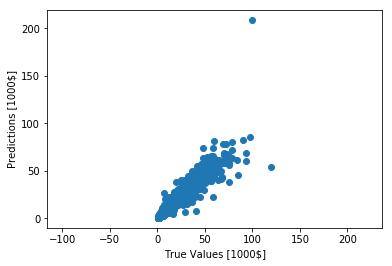

In [0]:
plt.scatter(np.exp(Y_valid_cb), np.exp(Y_pred_cb))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

(-7.658927156451747, 170.79039334099377)

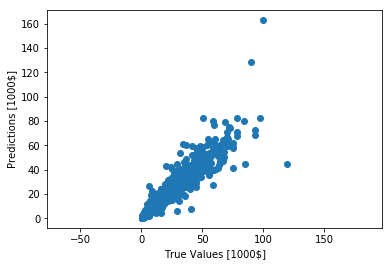

In [0]:
plt.scatter(np.exp(Y_valid_cb), np.exp(Y_pred_cb))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

(-5.88361055426316, 133.65597430638985)

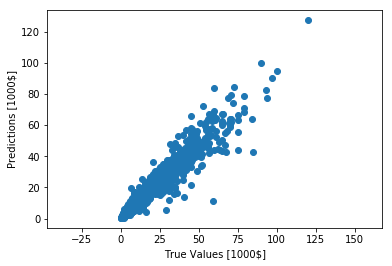

In [0]:
plt.scatter(np.exp(Y_valid), np.exp(Y_pred))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

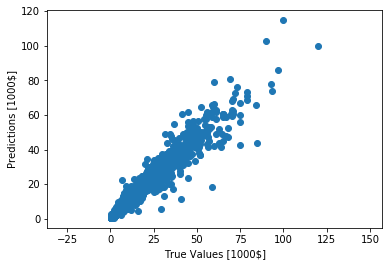

0.952222467480003


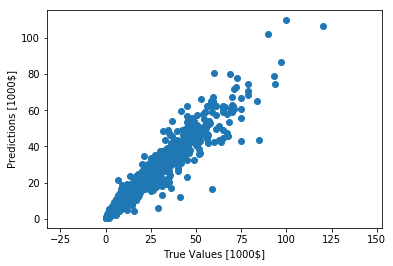

0.9529049943567504


In [0]:
from sklearn.metrics import r2_score
plt.scatter(np.exp(Y_valid), 0.6*np.exp(Y_pred) + 0.4*np.exp(Y_pred_cb))
#plt.scatter(np.exp(Y_valid), 0.7*np.exp(Y_pred) + 0.3*np.exp(Y_pred_cb))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()
print(r2_score(np.exp(Y_valid), 0.6*np.exp(Y_pred) + 0.4*np.exp(Y_pred_cb)))


plt.scatter(np.exp(Y_valid), 0.7*np.exp(Y_pred) + 0.3*np.exp(Y_pred_cb))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()
print(r2_score(np.exp(Y_valid), 0.75*np.exp(Y_pred) + 0.25*np.exp(Y_pred_cb)))

In [0]:
res = np.exp(Y_valid_cb)-np.exp(Y_pred_cb)
#res[res<-50]

np.where(res == res.min())

(array([1408]),)

In [0]:
np.exp(Y_valid_cb)[1408]

2.02

In [0]:
#training_set[training_set['Price']==2.02]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,age,km_by_age,log_Price
3132,7,22,14298,3,0,0,13.33,2995.0,340.0,5.0,1.36 Cr,2.02,24,326,0,inf,0.703098


## Catboost Regressor

In [0]:
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from catboost import CatBoostRegressor
#X,y=dftrain.drop('loan_default',axis=1),dftrain['loan_default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X_train_data,Y_train_data,test_size=0.15,random_state = 1994)


model =  CatBoostRegressor(iterations=10000,
                             learning_rate=0.085,
                             depth=3,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 500,
                             od_wait=100)
model.fit(X_train, y_train,
                 eval_set=(X_val, y_val),early_stopping_rounds=500,
                 cat_features=categorical_features_indices,
                 use_best_model=True)

predictions = model.predict(X_val)
print("MAE: " + str(mean_absolute_error(predictions, y_val)))
print("MSE: " + str(mean_squared_error(predictions, y_val)))
print("MSLE: " + str(mean_squared_log_error(np.exp(predictions), np.exp(y_val))))


0:	learn: 1.8406086	test: 1.8870874	best: 1.8870874 (0)	total: 8.67ms	remaining: 1m 26s
500:	learn: 0.1845557	test: 0.1831483	best: 0.1831233 (498)	total: 3.77s	remaining: 1m 11s
1000:	learn: 0.1706311	test: 0.1740953	best: 0.1740953 (1000)	total: 7.66s	remaining: 1m 8s
1500:	learn: 0.1632695	test: 0.1700720	best: 0.1700031 (1491)	total: 11.6s	remaining: 1m 5s
2000:	learn: 0.1594867	test: 0.1686331	best: 0.1686331 (2000)	total: 15.4s	remaining: 1m 1s
2500:	learn: 0.1563259	test: 0.1676373	best: 0.1674911 (2463)	total: 19.2s	remaining: 57.7s
3000:	learn: 0.1536860	test: 0.1667878	best: 0.1667285 (2992)	total: 23s	remaining: 53.7s
3500:	learn: 0.1515188	test: 0.1665145	best: 0.1663153 (3398)	total: 27s	remaining: 50.2s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.1663153132
bestIteration = 3398

Shrink model to first 3399 iterations.
MAE: 0.12489751201611572
MSE: 0.027660782934643677
MSLE: 0.01938177036845438


(-3.0123478021034473, 73.88221283349392)

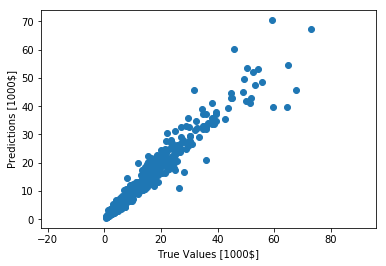

In [0]:
plt.scatter(np.exp(y_val), np.exp(predictions))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

### CB - Feature Importance

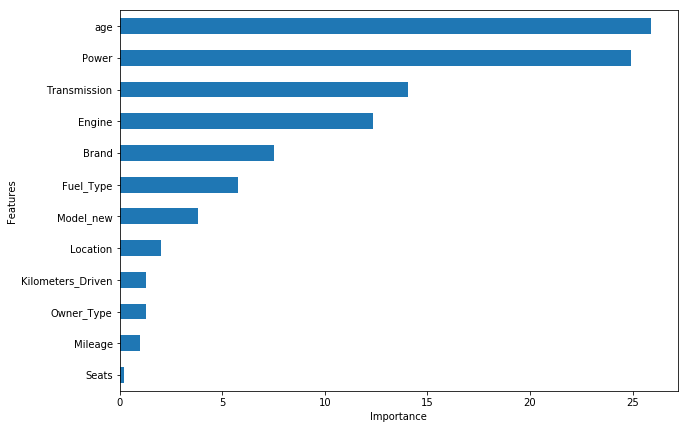

In [0]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': training_set_new.iloc[:, :-1].columns})
#fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': training_set_new.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
#plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

## Normal KFold 

In [0]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor

import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
#from scipy.stats import skew
#from collections import OrderedDict
from sklearn.model_selection import KFold
RANDOM_STATE = 88

def cross_val(X, y, X_test, n_splits=10):
    kf = KFold(n_splits=10, random_state=None)
    
    acc = []
    predict = None
    Y_pred =[]
    Y_valid =[]
    
    Y_pred_test = []
    
    for tr_ind, val_ind in kf.split(X):
      
      X_train = X[tr_ind]
      y_train = y[tr_ind]

      X_valid = X[val_ind]
      y_valid = y[val_ind]

      #clf = CatBoostClassifier(iterations=500,
      #                        loss_function = param['loss_function'],
      #                        depth=param['depth'],
      #                       l2_leaf_reg = param['l2_leaf_reg'],
      #                        eval_metric = 'Accuracy',
      #                        leaf_estimation_iterations = 10,
      #                        use_best_model=True,
      #                        logging_level='Silent'
      #)

      #clf = CatBoostRegressor(iterations=5000,
      #                  learning_rate=0.03,
      #                 depth=3, loss_function='RMSE',
      #                       bagging_temperature = 0.2,
      #                       od_type='Iter',
      #                       metric_period = 75,
      #                       od_wait=100)
   
      
      #clf.fit(X_train, 
       #       y_train,
       #       cat_features=cat_features,
       #       eval_set=(X_valid, y_valid),use_best_model=True, plot=True)
      
      clf = XGBRegressor(n_estimators=10000, learning_rate=0.07, max_depth= 3)
      
      clf.fit(X_train, y_train, 
             early_stopping_rounds=500, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

      y_pred = clf.predict(X_valid)
      #accuracy = accuracy_score(y_valid, y_pred)
      #acc.append(accuracy)
      Y_pred.append(y_pred)
      Y_valid.append(y_valid)
      
      Y_pred_test.append(clf.predict(X_test))
      
    
    #return sum(acc)/n_splits
    Y_pred = np.concatenate(Y_pred, axis=0)
    Y_valid = np.concatenate(Y_valid, axis=0)
    Y_final_pred_test = np.mean(Y_pred_test, axis=0)
    return Y_pred, Y_valid, Y_final_pred_test
    

In [0]:
Y_pred_kf, Y_valid_kf, Y_final_pred_test_kf = cross_val(X_train_data, Y_train_data, X_test, n_splits=10)

[10:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [0]:
1 - rmsle(np.exp(Y_valid_kf), np.exp(Y_pred_kf))

0.8630308484224012

## Light GBM

In [0]:
!pip install lightgbm

In [0]:
training_set_new.columns

NameError: ignored

In [0]:
#X_train, X_valid, y_train, y_valid = train_test_split(
#    X, y, test_size=0.25, random_state=42)

# Dependent Variable
Y_train_data = training_set_new.iloc[:, -1].values

# Independent Variables
X_train_data = training_set_new.iloc[:,0 : -1]

# Independent Variables for test Set
X_test = test_set.iloc[:,:]

feature_names = X_train_data.columns.tolist()
categorical = ['Brand', 'Model', 'Location', 'Year', 'Fuel_Type', 'Owner_Type']

import lightgbm as lgb

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_data, Y_train_data, test_size=0.30, random_state=42)
    
# LightGBM dataset formatting 
lgtrain = lgb.Dataset(X_train, y_train,
                feature_name=feature_names,
                categorical_feature = categorical)
lgvalid = lgb.Dataset(X_valid, y_valid,
                feature_name=feature_names,
                categorical_feature = categorical)

In [0]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='l1',
        early_stopping_rounds=1000)



#print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.970335	valid_0's l2: 0.783333	valid_0's l1: 0.690348
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's auc: 0.970811	valid_0's l2: 0.776517	valid_0's l1: 0.68729
[3]	valid_0's auc: 0.970811	valid_0's l2: 0.769712	valid_0's l1: 0.684236
[4]	valid_0's auc: 0.977302	valid_0's l2: 0.763238	valid_0's l1: 0.681286
[5]	valid_0's auc: 0.97887	valid_0's l2: 0.756775	valid_0's l1: 0.678352
[6]	valid_0's auc: 0.97843	valid_0's l2: 0.750221	valid_0's l1: 0.675359
[7]	valid_0's auc: 0.98013	valid_0's l2: 0.743709	valid_0's l1: 0.672382
[8]	valid_0's auc: 0.980878	valid_0's l2: 0.737368	valid_0's l1: 0.669457
[9]	valid_0's auc: 0.980262	valid_0's l2: 0.73103	valid_0's l1: 0.666523
[10]	valid_0's auc: 0.979804	valid_0's l2: 0.724682	valid_0's l1: 0.663575
[11]	valid_0's auc: 0.979451	valid_0's l2: 0.718374	valid_0's l1: 0.660606
[12]	valid_0's auc: 0.980156	valid_0's l2: 0.712324	valid_0's l1: 0.657778
[13]	valid_0's auc: 0.980729	valid_0's l2: 0.70616

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [0]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)


In [0]:
y_pred = model.predict(X_train)

In [0]:
from sklearn.metrics import mean_squared_log_error

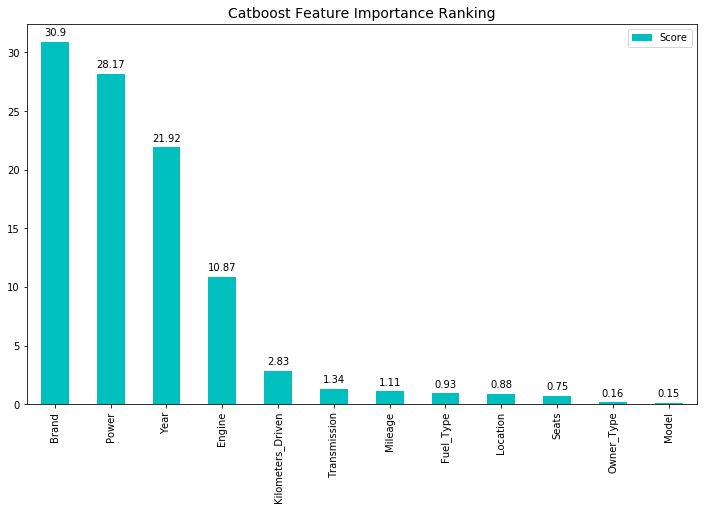

In [0]:

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

# Submission file 

In [0]:
stacking = 0.8*np.exp(Y_final_pred_test) + 0.2*np.exp(model.predict(X_test))
#Y_final_pred_test_kf

0.9997227682209344


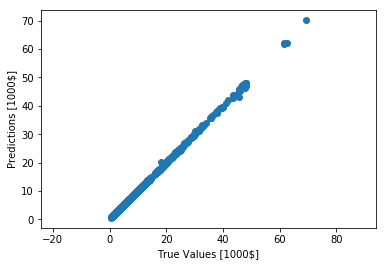

In [0]:
plt.scatter(np.exp(Y_final_pred_test), np.exp(Y_final_pred_test_kf))
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

print(r2_score(np.exp(Y_final_pred_test), np.exp(Y_final_pred_test_kf)))

In [0]:
np.exp(Y_final_pred_test).max()

70.414474

In [0]:
stacking = 0.3*np.exp(Y_final_pred_test) + 0.7*np.exp(Y_final_pred_test_cb) 

In [0]:
#submission_file = pd.DataFrame(np.exp(Y_final_pred_test))

#submission_file = pd.DataFrame(np.exp(my_model.predict(X_test)))

submission_file = pd.DataFrame(stacking)

submission_file.columns = ['Price'] 

In [0]:
#submission_file

df.to_excel('df.xlsx')
from google.colab import files
files.download('df.xlsx')

In [0]:
submission_file.to_excel('submission_file.xlsx', index=False)

In [0]:
uploaded = drive.CreateFile({'title': "submission_file.xlsx"})
uploaded.SetContentFile("submission_file.xlsx")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1coE2i-smiiiGJoQHam7qWA2p-ADqxfcP


## Grid Search - Cat boost

In [0]:
def Snippet_199(): 
    print()
    print(format('How to find optimal parameters for CatBoost using GridSearchCV for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from catboost import CatBoostRegressor

    model = CatBoostRegressor(cat_features = categorical_features_indices)
    parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [300, 500, 100]
                 }
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
    grid.fit(X_train, y_train)    

    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
    print("\n ========================================================")
Snippet_199()


**How to find optimal parameters for CatBoost using GridSearchCV for Regression***
0:	learn: 14.8133538	total: 28ms	remaining: 2.77s
1:	learn: 14.6973525	total: 48.5ms	remaining: 2.37s
2:	learn: 14.5844986	total: 70.1ms	remaining: 2.27s
3:	learn: 14.4673052	total: 76.4ms	remaining: 1.83s
4:	learn: 14.3603740	total: 97.5ms	remaining: 1.85s
5:	learn: 14.2527414	total: 102ms	remaining: 1.6s
6:	learn: 14.1496777	total: 124ms	remaining: 1.64s
7:	learn: 14.0380078	total: 134ms	remaining: 1.54s
8:	learn: 13.9386545	total: 155ms	remaining: 1.57s
9:	learn: 13.8295864	total: 177ms	remaining: 1.6s
10:	learn: 13.7338997	total: 199ms	remaining: 1.61s
11:	learn: 13.6315691	total: 220ms	remaining: 1.61s
12:	learn: 13.5390629	total: 247ms	remaining: 1.66s
13:	learn: 13.4389242	total: 257ms	remaining: 1.58s
14:	learn: 13.3367127	total: 271ms	remaining: 1.53s
15:	learn: 13.2419261	total: 292ms	remaining: 1.53s
16:	learn: 13.1413515	total: 312ms	remaining: 1.52s
17:	learn: 13.0440670	total: 319ms	remain

In [0]:
model = CatBoostRegressor(iterations=200,
                          learning_rate=0.01,
                          depth=10)
# Fit model
model.fit(X_train, y_train)
# Get predictions
preds = model.predict(X_val)

0:	learn: 14.8165664	total: 18.5ms	remaining: 3.67s
1:	learn: 14.7071447	total: 34.5ms	remaining: 3.42s
2:	learn: 14.6020427	total: 51ms	remaining: 3.35s
3:	learn: 14.4955479	total: 68ms	remaining: 3.33s
4:	learn: 14.3867131	total: 84.6ms	remaining: 3.3s
5:	learn: 14.2741463	total: 87.8ms	remaining: 2.84s
6:	learn: 14.1638724	total: 91.4ms	remaining: 2.52s
7:	learn: 14.0658743	total: 108ms	remaining: 2.59s
8:	learn: 13.9614927	total: 125ms	remaining: 2.66s
9:	learn: 13.8561126	total: 135ms	remaining: 2.56s
10:	learn: 13.7576474	total: 151ms	remaining: 2.59s
11:	learn: 13.6542392	total: 156ms	remaining: 2.44s
12:	learn: 13.5532605	total: 172ms	remaining: 2.48s
13:	learn: 13.4456029	total: 176ms	remaining: 2.34s
14:	learn: 13.3483813	total: 192ms	remaining: 2.37s
15:	learn: 13.2443013	total: 199ms	remaining: 2.29s
16:	learn: 13.1491538	total: 215ms	remaining: 2.31s
17:	learn: 13.0464708	total: 235ms	remaining: 2.37s
18:	learn: 12.9565566	total: 251ms	remaining: 2.39s
19:	learn: 12.857065

In [0]:
preds

array([ 2.54971529,  1.80065121,  3.92831   , ...,  5.58261482,
       33.6603473 , 24.64009269])

In [0]:
y_val

array([ 1.5 ,  1.1 ,  3.2 , ...,  7.  , 64.75, 29.95])

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=40,random_state=1994,eval_metric='AUC',max_depth=6,learning_rate=0.029,od_wait=50
                     ,l2_leaf_reg=10,cat_features=categorical_features_indices,bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(dftest)[:,-1]
    y_pred_totcb.append(p)

## GridSearchCV with CatBoost 

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from catboost import CatBoostRegressor

In [0]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25] ,
 "depth"        : [ 3, 5, 6, 8]    
}

In [0]:
model = CatBoostRegressor()

In [0]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=500,n_jobs=-1,cv=3,verbose=3)

In [0]:
random_search.fit(X_train_data,Y_train_data)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 20 is smaller than n_iter=500. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.1min finished


0:	learn: 1.9334012	total: 51.9ms	remaining: 51.8s
1:	learn: 1.8434757	total: 55.6ms	remaining: 27.8s
2:	learn: 1.7616298	total: 59.8ms	remaining: 19.9s
3:	learn: 1.6832857	total: 63.4ms	remaining: 15.8s
4:	learn: 1.6095759	total: 66.9ms	remaining: 13.3s
5:	learn: 1.5396178	total: 70.6ms	remaining: 11.7s
6:	learn: 1.4712234	total: 74.2ms	remaining: 10.5s
7:	learn: 1.4064218	total: 77.7ms	remaining: 9.63s
8:	learn: 1.3451905	total: 81.5ms	remaining: 8.97s
9:	learn: 1.2856513	total: 85.2ms	remaining: 8.44s
10:	learn: 1.2317338	total: 89.2ms	remaining: 8.02s
11:	learn: 1.1793144	total: 92.8ms	remaining: 7.64s
12:	learn: 1.1315640	total: 96.5ms	remaining: 7.33s
13:	learn: 1.0840954	total: 100ms	remaining: 7.05s
14:	learn: 1.0388783	total: 104ms	remaining: 6.82s
15:	learn: 0.9957780	total: 108ms	remaining: 6.62s
16:	learn: 0.9558871	total: 111ms	remaining: 6.44s
17:	learn: 0.9187461	total: 115ms	remaining: 6.27s
18:	learn: 0.8822466	total: 119ms	remaining: 6.12s
19:	learn: 0.8478528	total: 

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fb88a931898>,
                   iid='warn', n_iter=500, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 6, 8],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [0]:
random_search.best_estimator_

In [0]:
random_search.best_params_

{'depth': 3, 'learning_rate': 0.05}

# Stacking

In [0]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import Lasso, ElasticNet, Ridge

class Ensemble(BaseEstimator, RegressorMixin):
    def __init__(self, regressors=None):
        self.regressors = regressors
        
    def level0_to_level1(self, X):
        self.predictions_ = []

        for regressor in self.regressors:
            self.predictions_.append(regressor.predict(X).reshape(X.shape[0],1))

        return np.concatenate(self.predictions_, axis=1)
    
    def fit(self, X, y):
        for regressor in self.regressors:
          regressor.fit(X, y)
             # Neural Network
            
        self.new_features = self.level0_to_level1(X)
        
        # using a large L2 regularization to prevent the ensemble from biasing toward 
        # one particular base model
        self.combine = Ridge(alpha=10, max_iter=50000)   
        self.combine.fit(self.new_features, y)

        self.coef_ = self.combine.coef_

    def predict(self, X):
        self.new_features = self.level0_to_level1(X)
            
        return self.combine.predict(self.new_features).reshape(X.shape[0])

In [0]:
model = Ensemble(regressors=[xgb, las, elast, ridge, nn])
model.fit(X_train, y_train)
y_pred = np.exp(model.predict(X_test))

print("\nThe weights of the five base models are: {}".format(model.coef_))

In [0]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor

import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
#from scipy.stats import skew
#from collections import OrderedDict

RANDOM_STATE = 88

def cross_val(X, y, X_test, n_splits=20):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    
    acc = []
    predict = None
    Y_pred =[]
    Y_valid =[]
    
    Y_pred_test = []
    
    for tr_ind, val_ind in skf.split(X,y_binned):
      
      X_train = X[tr_ind]
      y_train = y[tr_ind]

      X_valid = X[val_ind]
      y_valid = y[val_ind]

      #clf = CatBoostClassifier(iterations=500,
      #                        loss_function = param['loss_function'],
      #                        depth=param['depth'],
      #                       l2_leaf_reg = param['l2_leaf_reg'],
      #                        eval_metric = 'Accuracy',
      #                        leaf_estimation_iterations = 10,
      #                        use_best_model=True,
      #                        logging_level='Silent'
      #)

      #clf = CatBoostRegressor(iterations=5000,
      #                  learning_rate=0.03,
      #                 depth=3, loss_function='RMSE',
      #                       bagging_temperature = 0.2,
      #                       od_type='Iter',
      #                       metric_period = 75,
      #                       od_wait=100)
   
      
      #clf.fit(X_train, 
       #       y_train,
       #       cat_features=cat_features,
       #       eval_set=(X_valid, y_valid),use_best_model=True, plot=True)
      
      xgb = XGBRegressor(n_estimators=10000, learning_rate=0.092, max_depth= 3, min_child_weight =1,
                        early_stopping_rounds=500)
      
 
      
      cb =  CatBoostRegressor(iterations=10000,
                             learning_rate=0.085,
                             depth=3,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 100,
                             od_wait=500)
                             #early_stopping_rounds=500)
      
      model = Ensemble(regressors=[xgb, cb])
      model.fit(X_train, y_train)
      
    

      y_pred = model.predict(X_valid)
      #accuracy = accuracy_score(y_valid, y_pred)
      #acc.append(accuracy)
      Y_pred.append(y_pred)
      Y_valid.append(y_valid)
      
      Y_pred_test.append(model.predict(X_test))
      
    
    #return sum(acc)/n_splits
    Y_pred = np.concatenate(Y_pred, axis=0)
    Y_valid = np.concatenate(Y_valid, axis=0)
    Y_final_pred_test = np.mean(Y_pred_test, axis=0)
    return Y_pred, Y_valid, Y_final_pred_test  

In [0]:
Y_pred_stack, Y_valid_stack, Y_final_pred_test_stack = cross_val(X_train_data, Y_train_data, X_test, n_splits=20)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[20:57:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 1.8661900	total: 51.7ms	remaining: 8m 37s
100:	learn: 0.2637088	total: 425ms	remaining: 41.6s
200:	learn: 0.2268402	total: 819ms	remaining: 39.9s
300:	learn: 0.2101926	total: 1.2s	remaining: 38.7s
400:	learn: 0.1998586	total: 1.59s	remaining: 38.2s
500:	learn: 0.1940170	total: 1.97s	remaining: 37.4s
600:	learn: 0.1909758	total: 2.36s	remaining: 36.8s
700:	learn: 0.1871077	total: 2.75s	remaining: 36.5s
800:	learn: 0.1842121	total: 3.14s	remaining: 36.1s
900:	learn: 0.1815013	total: 3.53s	remaining: 35.6s
1000:	learn: 0.1800823	total: 3.91s	remaining: 35.2s
1100:	learn: 0.1782409	total: 4.29s	remaining: 34.7s
1200:	learn: 0.1772879	total: 4.7s	remaining: 34.4s
1300:	learn: 0.1754321	total: 5.09s	remaining: 34.1s
1400:	learn: 0.1742671	total: 5.49s	remaining: 33.7s
1500:	learn: 0.1733303	total: 5.88s	remaining: 33.3s
1600:	learn: 0.1719712	total: 6.26s	r

In [0]:
1 - rmsle(np.exp(Y_valid_stack), np.exp(Y_pred_stack))

0.8535133423909715